# Note
Ce fichier génère une archive de notre DataFrame nettoyé et complété, au format pkl : **base_ml.pkl**

Temps d'exécution : environ 2h45

# Spécifique Google Drive

In [ ]:
# monter le google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pour calculer le temps d'execution de chaque cellule
!pip install ipython-autotime
%load_ext autotime

time: 177 µs (started: 2022-05-14 15:44:16 +00:00)


# Préparation : environnement de travail, lecture des csv, fusion des bases

In [ ]:
# Paramétrage dossiers de travail + fichier de sortie

# Dossier des données d'entrée
inputs_rep = '/content/drive/MyDrive/Projet Pompier/Github/structure_finale/data_inputs/'

# Dossier des données de sortie
outputs_rep = '/content/drive/MyDrive/Projet Pompier/Github/structure_finale/data_outputs/'

# Nom du fichier de sortie (base nettoyée) qui sera généré par ce notebook
output_file = 'base_ml.pkl'

time: 2.4 ms (started: 2022-05-14 15:44:16 +00:00)


In [ ]:
# Installation de modules supplémentaires (pour création variables des congés)
!pip install workalendar==16.1.0

     |████████████████████████████████| 205 kB 4.9 MB/s 
     |████████████████████████████████| 70 kB 8.7 MB/s 
time: 3.24 s (started: 2022-05-14 15:44:16 +00:00)


In [ ]:
# Importation des modules nécessaires

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date
from datetime import datetime

# pour utilisation dans calculs des nombres de véhicules
from numpy.core.numeric import NaN

# pour utilisation dans création variables externes congés
import tqdm
from workalendar.europe.united_kingdom import UnitedKingdom

# Pour visualisation de la totalité des colonnes des dataframes
pd.set_option('display.max_columns', None)    

time: 652 ms (started: 2022-05-14 15:44:19 +00:00)


In [ ]:
# Lecture des fichiers csv

file = inputs_rep + 'LFB Incident data Last 3 years + gps.csv'
inc = pd.read_csv(file, sep=";", encoding= 'utf-8')

file = inputs_rep + 'LFB Mobilisation data Last 3 years + pump.csv'
mob = pd.read_csv(file, sep=";", encoding= 'utf-8')

time: 9.44 s (started: 2022-05-14 15:44:20 +00:00)


In [ ]:
# Aperçu du fichier des incidents
inc.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),Lat,Lon
0,000008-01012018,01 Jan 2018,2018,00:04:25,0,False Alarm,AFA,NaN,Non Residential,Mosque,Within same building,N2 8AY,N2,200220110,20013420,E09000003,BARNET,Barnet,E05000049,EAST FINCHLEY,EAST FINCHLEY,527184.0,189488.0,527150,189450,"51,589900219","-0,1654525778",London,Finchley,348.0,Finchley,NaN,NaN,1.0,1.0,1.0,1.0,328.0,"51,5895637591541","-0,165982038030211"
1,000227-01012018,01 Jan 2018,2018,06:48:28,6,Special Service,Special Service,Lift Release,Non Residential,Warehouse,Correct incident location,SE1 4AU,SE1,200003494184,22501547,E09000028,SOUTHWARK,Southwark,E05011098,Chaucer,Chaucer,532728.0,179681.0,532750,179650,"51,5004919899","-0,0891665477",London,Dowgate,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,328.0,"51,5002069260063","-0,088887026592211"
2,000193-01012018,01 Jan 2018,2018,04:12:25,4,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW6,0,21000739,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05000262,SANDS END,SANDS END,NaN,NaN,525850,176150,NaN,NaN,London,Fulham,351.0,Wandsworth,410.0,Chelsea,2.0,2.0,2.0,1.0,328.0,"51,4703293980461","-0,189485494202684"
3,000041-01012018,01 Jan 2018,2018,00:27:18,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,N8,0,21103615,E09000014,HARINGEY,Haringey,E05000269,CROUCH END,CROUCH END,NaN,NaN,530150,188550,NaN,NaN,London,Hornsey,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,328.0,"51,5807915829801","-0,123035033643313"
4,000127-01012018,01 Jan 2018,2018,01:39:54,1,Special Service,Special Service,Flooding,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,N8,0,21104022,E09000014,HARINGEY,Haringey,E05000279,STROUD GREEN,STROUD GREEN,NaN,NaN,530950,188650,NaN,NaN,London,Hornsey,336.0,Hornsey,NaN,NaN,1.0,1.0,1.0,1.0,328.0,"51,5815051015246","-0,111458689425031"


time: 98.1 ms (started: 2022-05-14 15:44:29 +00:00)


In [ ]:
# Aperçu du fichier des véhicules
mob.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,Appliance
0,000008-01012018,2018,0,5055153,A392,1,01/01/2018 00:04:25,01/01/2018 00:05:38,01/01/2018 00:10:13,73.0,275.0,348,01/01/2018 00:16:38,NaN,A39,Finchley,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Pump Ladder
1,000009-01012018,2018,0,5055154,E431,1,01/01/2018 00:04:31,01/01/2018 00:05:23,01/01/2018 00:06:55,52.0,92.0,144,01/01/2018 00:08:31,NaN,E43,Beckenham,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Pump Dual Ladder
2,000010-01012018,2018,0,5055155,A361,1,01/01/2018 00:04:34,01/01/2018 00:05:36,01/01/2018 00:08:26,62.0,170.0,232,01/01/2018 00:13:11,NaN,A36,Southgate,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Pump Dual Ladder
3,000011-01012018,2018,0,5055156,A351,1,01/01/2018 00:04:58,01/01/2018 00:05:17,01/01/2018 00:05:20,19.0,3.0,22,01/01/2018 00:26:09,NaN,A35,Enfield,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Pump Dual Ladder
4,000014-01012018,2018,0,5055157,F211,1,01/01/2018 00:07:47,01/01/2018 00:08:58,01/01/2018 00:11:48,71.0,170.0,241,01/01/2018 00:31:13,NaN,F21,Stratford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Pump Dual Ladder


time: 50.9 ms (started: 2022-05-14 15:44:29 +00:00)


In [ ]:
# Regroupement des 2 fichiers
lfb = mob.merge(right = inc, on = 'IncidentNumber', how = 'left')

# Taille du dataframe après fusion
lfb.shape

(589390, 62)

time: 3.17 s (started: 2022-05-14 15:44:29 +00:00)


Le choix a été fait de travailler sur la liste complète des véhicules qui sont intervenus sur les incidents.

C'est pourquoi nous partons du dataframe 'mob' (les véhicules), que l'on complète des informations du dataframe 'inc'  (les incidents).


# Suppressions de colonnes inutiles

In [ ]:
# Suppression des colonnes jugées inutiles parmi les 62 colonnes de la table fusionnée

# Création d'une liste contenant toutes les colonnes + Décommenter les colonnes à supprimer + justification à droite 

remove_col = [
              #'IncidentNumber',                         #
              #'CalYear_x',                              #
              #'HourOfCall_x',                           #
              'ResourceMobilisationId',                 # identifiant unique de mobilisation = inutile
              #'Resource_Code',                          #
              'PerformanceReporting',                   # lié à PumpOrder, redondance de l'info
              #'DateAndTimeMobilised',                   #
              #'DateAndTimeMobile',                      #
              #'DateAndTimeArrived',                     #
              #'TurnoutTimeSeconds',                     #
              #'TravelTimeSeconds',                      #
              #'AttendanceTimeSeconds',                  #
              #'DateAndTimeLeft',                        #
              'DateAndTimeReturned',                    # que des NaN (non utilisé)
              #'DeployedFromStation_Code',               #
              #'DeployedFromStation_Name',               #
              #'DeployedFromLocation',                   #
              #'PumpOrder',                              # ordre des véhicules envoyés (1 à n)
              'PlusCode_Code',                          # que 'initial' dans toutes les lignes = inutile
              'PlusCode_Description',                   # que 'initial mobilisation' dans toutes les lignes = inutile
              'DelayCodeId',                            # information à posteriori qu'on ne pourra utiliser pour des prédictions
              #'DelayCode_Description',                  # information à posteriori, mais à conserver pour l'instant
              #'Appliance'                               # nouvelle colonne Appliance (base enrichie)
              #'DateOfCall',                             #
              #'CalYear_y',                              #
              #'TimeOfCall',                             #
              #'HourOfCall_y',                           #
              #'IncidentGroup',                          #
              #'StopCodeDescription',                    #
              #'SpecialServiceType',                     #
              #'PropertyCategory',                       #
              #'PropertyType',                           #
              #'AddressQualifier',                       #
              'Postcode_full',                          # données postales / géo = inutile
              'Postcode_district',                      # données postales / géo = inutile
              'UPRN',                                   # données postales / géo = inutile
              'USRN',                                   # données postales / géo = inutile
              'IncGeo_BoroughCode',                     # données postales / géo = inutile
              'IncGeo_BoroughName',                     # données postales / géo = inutile
              'ProperCase',                             # données postales / géo = inutile
              'IncGeo_WardCode',                        # données postales / géo = inutile
              'IncGeo_WardName',                        # données postales / géo = inutile
              'IncGeo_WardNameNew',                     # données postales / géo = inutile
              'Easting_m',                              # incomplètes
              'Northing_m',                             # incomplètes
              'Easting_rounded',                        # supprimé suite modification base avec colonnes long/lat exploitables
              'Northing_rounded',                       # supprimé suite modification base avec colonnes long/lat exploitables
              'Latitude',                               # incomplètes
              'Longitude',                              # incomplètes
              'FRS',                                    # uniquement 'London' = inutile
              #'IncidentStationGround',                  #
              'FirstPumpArriving_AttendanceTime',       # info partielle, on a un détail plus fin/complet dans autres colonnes 
              'FirstPumpArriving_DeployedFromStation',  # info partielle, on a un détail plus fin/complet dans autres colonnes
              'SecondPumpArriving_AttendanceTime',      # info partielle, on a un détail plus fin/complet dans autres colonnes
              'SecondPumpArriving_DeployedFromStation', # info partielle, on a un détail plus fin/complet dans autres colonnes
              #'NumStationsWithPumpsAttending',          #
              #'NumPumpsAttending',                      #
              #'PumpCount',                              # total nb véhicules sur l'incident => des incohérences seront à corriger
              'PumpHoursRoundUp',                       # on se connaît pas la méthode / provenance de l'info
              'Notional Cost (£)',                      # coût théorique basé sur "PumpHoursRoundUp" qu'on ne maîtrise pas
              #'Lat',                                    # nouvelle colonne Latitude (base enrichie)
              #'Lon',                                    # nouvelle colonne Longitude (base enrichie)
              ]

# supprimer les colonnes du dataframe, stocker le nouveau dataframe dans df
# (on gardera 'lfb' comme base brute fusionnée, avant nettoyages)

df = lfb.drop(remove_col, axis = 1)


time: 631 ms (started: 2022-05-14 15:44:32 +00:00)


# Contrôle des doublons

In [ ]:
# contrôle des doublons
df.duplicated().sum()

0

time: 2.53 s (started: 2022-05-14 15:44:33 +00:00)


ok, aucun doublon à traiter

# Travaux sur les valeurs manquantes (NaN)

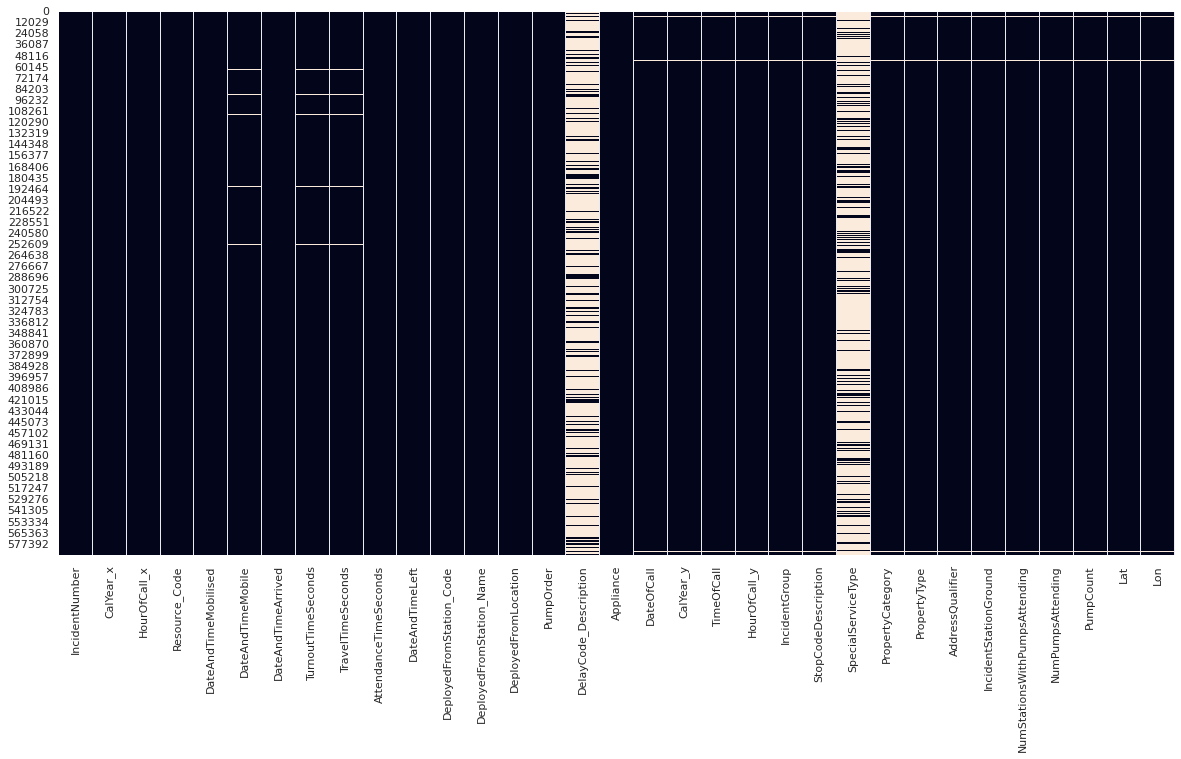

time: 33.3 s (started: 2022-05-14 15:44:36 +00:00)


In [ ]:
# Visualisation des NaNs
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False);

In [ ]:
# Contrôle des Nan
df.isna().sum()

IncidentNumber                        0
CalYear_x                             0
HourOfCall_x                          0
Resource_Code                         0
DateAndTimeMobilised                  0
DateAndTimeMobile                  3825
DateAndTimeArrived                    0
TurnoutTimeSeconds                 3831
TravelTimeSeconds                  3905
AttendanceTimeSeconds                 0
DateAndTimeLeft                     260
DeployedFromStation_Code             16
DeployedFromStation_Name             16
DeployedFromLocation                337
PumpOrder                             0
DelayCode_Description            457047
Appliance                             0
DateOfCall                         2317
CalYear_y                          2317
TimeOfCall                         2317
HourOfCall_y                       2317
IncidentGroup                      2317
StopCodeDescription                2317
SpecialServiceType               463973
PropertyCategory                   2317


time: 568 ms (started: 2022-05-14 15:45:09 +00:00)


## NaN sur DateOfCall

In [ ]:
# Visu de la totalité des NaN sur les lignes où DateOfCall = NaN
(df[df['DateOfCall'].isna()]).isna().sum()

IncidentNumber                      0
CalYear_x                           0
HourOfCall_x                        0
Resource_Code                       0
DateAndTimeMobilised                0
DateAndTimeMobile                  22
DateAndTimeArrived                  0
TurnoutTimeSeconds                 22
TravelTimeSeconds                  22
AttendanceTimeSeconds               0
DateAndTimeLeft                     3
DeployedFromStation_Code            3
DeployedFromStation_Name            3
DeployedFromLocation                1
PumpOrder                           0
DelayCode_Description             528
Appliance                           0
DateOfCall                       2317
CalYear_y                        2317
TimeOfCall                       2317
HourOfCall_y                     2317
IncidentGroup                    2317
StopCodeDescription              2317
SpecialServiceType               2317
PropertyCategory                 2317
PropertyType                     2317
AddressQuali

time: 48.1 ms (started: 2022-05-14 15:45:09 +00:00)


On constate que ces 2317 valeurs manquantes, se retrouvent sur de nombreuses colonnes.
La démarche sera d'identifier les incidents concernés par ces valeurs manquantes, afin de supprimer ensuite les incidents complets concernés, de la base de données.

En procédant ainsi, on s'assure qu'on elimine tous les véhicules d'un incident qui contient des valeurs manquantes, évitant par là même de conserver des observations partielles (le risque étant de ne conserver qu'une partie des véhicules mobilisés sur l'incident).


In [ ]:
# Liste des IncidentNumber pour lesquels DateOfCall = NaN
inc_nan_list = list(df[df['DateOfCall'].isna()]['IncidentNumber'].unique())

print(len(inc_nan_list), "incidents avec des NaN dans 'DateOfCall'")
print(df.shape[0], "lignes avant suppression incidents avec NaN")

# Suppression de ces incidents
df = df.drop(axis=0, index=df[df['IncidentNumber'].isin(inc_nan_list)].index)

print(df.shape[0], "lignes après suppression des incidents avec NaN")

1963 incidents avec des NaN dans 'DateOfCall'
589390 lignes avant suppression incidents avec NaN
587073 lignes après suppression des incidents avec NaN
time: 216 ms (started: 2022-05-14 15:45:10 +00:00)


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

DateAndTimeMobile             3803
TurnoutTimeSeconds            3809
TravelTimeSeconds             3883
DateAndTimeLeft                257
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456519
SpecialServiceType          461656
dtype: int64

time: 1.14 s (started: 2022-05-14 15:45:10 +00:00)


## NaN sur DateAndTimeMobile / TurnoutTimeSeconds / TravelTimeSeconds + DateAndTimeMobilised

**Principe :**

DateAndTimeMobile = DateAndTimeMobilised + TurnoutTimeSeconds

Les travaux seront faits en **4 étapes (après pré-contrôle)** :
1. Convertir les variables au format datetime
2. DateAndTimeMobile NaN
3. TravelTimeSeconds NaN
4. TurnoutTimeSeconds NaN (restant)

In [ ]:
# Contrôle qu'aucun DateAndTimeMpbile ne peut être renseigné au préalable : 
print(df[df['DateAndTimeMobile'].isna()]['TurnoutTimeSeconds'].unique(), "= Valeurs de TurnoutTimeSecondes pour DateAndTimeMobile NaN")
# Nan -> tous les NaN de DateAndTimeMobile ont NaN en TurnoutTimeSeconds

print(df[df['DateAndTimeMobile'].isna()]['TravelTimeSeconds'].unique(), "= Valeurs de TravelTimeSeconds pour DateAndTimeMobile NaN")
# tous les NaN de DateAndTimeMobile ont NaN en TravelTimeSeconds


[nan] = Valeurs de TurnoutTimeSecondes pour DateAndTimeMobile NaN
[nan] = Valeurs de TravelTimeSeconds pour DateAndTimeMobile NaN
time: 91.1 ms (started: 2022-05-14 15:45:11 +00:00)


1.   Conversion format datetime

In [ ]:
#Conversion 4 variables au format datetime (hors DateOfCall )

df['DateAndTimeMobile'] = pd.to_datetime(df['DateAndTimeMobile'], format="%d/%m/%Y %H:%M:%S")
df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised'], format="%d/%m/%Y %H:%M:%S")
df['DateAndTimeLeft'] = pd.to_datetime(df['DateAndTimeLeft'], format="%d/%m/%Y %H:%M:%S")
df['DateAndTimeArrived'] = pd.to_datetime(df['DateAndTimeArrived'], format="%d/%m/%Y %H:%M:%S")

time: 6.22 s (started: 2022-05-14 15:45:11 +00:00)


2. DateAndTimeMobile

In [ ]:
# Visu des 1ères lignes pour lesquelles DateAndTimeMobile est NaN
display(df[df['DateAndTimeMobile'].isna()].head())

# Voir si dans ces lignes, les autres variables de dates sont NaN ou ont des valeurs
print('NaN => ', df[df['DateAndTimeMobile'].isna()]['TurnoutTimeSeconds'].isna().value_counts(), '\n')
print('NaN => ', df[df['DateAndTimeMobile'].isna()]['TravelTimeSeconds'].isna().value_counts(), '\n')
print('NaN => ', df[df['DateAndTimeMobile'].isna()]['AttendanceTimeSeconds'].isna().value_counts())

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
75,000143-01012018,2018,2,A392,2018-01-01 02:00:46,NaT,2018-01-01 02:07:47,NaN,NaN,421,2018-01-01 02:13:27,A43,Kentish Town,Other Station,2,NaN,Pump Ladder,01 Jan 2018,2018.0,02:00:46,2.0,Special Service,Special Service,Spills and Leaks (not RTC),Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,Holloway,2.0,2.0,2.0,"51,5700768618677","-0,12780540728735"
103,000181-01012018,2018,3,G301,2018-01-01 03:40:29,NaT,2018-01-01 03:42:19,NaN,NaN,110,2018-01-01 03:49:18,G30,Wembley,Home Station,2,NaN,Pump Dual Ladder,01 Jan 2018,2018.0,03:40:28,3.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Ealing,4.0,4.0,4.0,"51,5215235336955","-0,305654439455797"
167,000265-01012018,2018,9,F241,2018-01-01 09:58:12,NaT,2018-01-01 10:02:08,NaN,NaN,236,2018-01-01 10:21:51,A24,Soho,Other Station,1,NaN,Pump Dual Ladder,01 Jan 2018,2018.0,09:53:11,9.0,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,Soho,1.0,1.0,1.0,"51,51532741061","-0,134374995102355"
950,001188-03012018,2018,13,A411,2018-01-03 13:45:10,NaT,2018-01-03 13:48:00,NaN,NaN,170,2018-01-03 13:50:49,A21,Paddington,Other Station,1,NaN,Pump Dual Ladder,03 Jan 2018,2018.0,13:45:10,13.0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,West Hampstead,2.0,4.0,4.0,"51,5487598838869","-0,20223906751951"
1113,001374-03012018,2018,23,H411,2018-01-03 23:54:58,NaT,2018-01-03 23:55:25,NaN,NaN,27,2018-01-04 00:06:03,H41,Kingston,Home Station,1,NaN,Pump Dual Ladder,03 Jan 2018,2018.0,23:54:14,23.0,Special Service,Special Service,Flooding,Non Residential,Hospital,Correct incident location,Kingston,1.0,2.0,2.0,"51,4150729460314","-0,282269450820537"


NaN =>  True    3803
Name: TurnoutTimeSeconds, dtype: int64 

NaN =>  True    3803
Name: TravelTimeSeconds, dtype: int64 

NaN =>  False    3803
Name: AttendanceTimeSeconds, dtype: int64
time: 77.6 ms (started: 2022-05-14 15:45:17 +00:00)


On constate sur les lignes comportant des NaN dans la variable DateAndTimeMobile, que :
*   les variables TurnoutTimeSeconds et TravelTimeSeconds sont également des NaN ;
*   la variable AttendanceTimeSeconds est présente (n'est pas un NaN).


La démarche de traitement des valeurs manquantes sera donc :
*   calculer un TurnoutTimeSeconds théorique (basé sur AttendanceTimeSeconds)
*   recalculer TravelTime par différence (AttendanceTimeSeconds - TurnoutTimeSeconds)
*   recalculer DateAndTimeMobile = DateAndTimeMobilised + TurnoutTimeSeconds

In [ ]:
# liste des index concernés
index_mobile_nan = list(df[df['DateAndTimeMobile'].isna()].index)

time: 7.83 ms (started: 2022-05-14 15:45:17 +00:00)


In [ ]:
## Estimation des TurnoutTimeSeconds manquants

# Proportion globale TurnoutTimeSeconds dans AttendanceTimeSeconds (pour les véhicules sans NaN)

# calcul du TurnoutTimeSeconds moyen pour les véhicules sans NaN
turnout_avg = df[df.notna()]['TurnoutTimeSeconds'].mean()

# Calcul du AttendanceTimeSeconds moyen pour les véhicules sans NaN
attendance_avg = df[df.notna()]['AttendanceTimeSeconds'].mean()

# Calcul de proportion TurnoutTime vs AttendanceTimeSeconds pour les véhicules sans NaN
turnout_prop = turnout_avg/attendance_avg


# Boucle pour corriger les TurnoutTimeSeconds manquant
for i in index_mobile_nan:
    
    # Remplir les TurnoutTimeSeconds manquants
    df['TurnoutTimeSeconds'].loc[i] = np.round(df['AttendanceTimeSeconds'].loc[i] * turnout_prop , 0)
    
    # recalculer TravelTimeSeconds par différence (AttendanceTimeSeconds - TurnoutTimeSeconds)
    df['TravelTimeSeconds'][i] = df['AttendanceTimeSeconds'][i] - df['TurnoutTimeSeconds'][i]

    # recalculer DateAndTimeMobile = DateAndTimeMobilised + TurnoutTimeSeconds
    df['DateAndTimeMobile'][i] = pd.to_datetime(df['DateAndTimeMobilised'][i]) + pd.to_timedelta(df['TurnoutTimeSeconds'][i], unit = 's')


# Visu sortie pour contrôle
df.loc[index_mobile_nan]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
75,000143-01012018,2018,2,A392,2018-01-01 02:00:46,2018-01-01 02:02:17,2018-01-01 02:07:47,91.0,330.0,421,2018-01-01 02:13:27,A43,Kentish Town,Other Station,2,NaN,Pump Ladder,01 Jan 2018,2018.0,02:00:46,2.0,Special Service,Special Service,Spills and Leaks (not RTC),Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,Holloway,2.0,2.0,2.0,"51,5700768618677","-0,12780540728735"
103,000181-01012018,2018,3,G301,2018-01-01 03:40:29,2018-01-01 03:40:53,2018-01-01 03:42:19,24.0,86.0,110,2018-01-01 03:49:18,G30,Wembley,Home Station,2,NaN,Pump Dual Ladder,01 Jan 2018,2018.0,03:40:28,3.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Ealing,4.0,4.0,4.0,"51,5215235336955","-0,305654439455797"
167,000265-01012018,2018,9,F241,2018-01-01 09:58:12,2018-01-01 09:59:03,2018-01-01 10:02:08,51.0,185.0,236,2018-01-01 10:21:51,A24,Soho,Other Station,1,NaN,Pump Dual Ladder,01 Jan 2018,2018.0,09:53:11,9.0,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,Soho,1.0,1.0,1.0,"51,51532741061","-0,134374995102355"
950,001188-03012018,2018,13,A411,2018-01-03 13:45:10,2018-01-03 13:45:47,2018-01-03 13:48:00,37.0,133.0,170,2018-01-03 13:50:49,A21,Paddington,Other Station,1,NaN,Pump Dual Ladder,03 Jan 2018,2018.0,13:45:10,13.0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,West Hampstead,2.0,4.0,4.0,"51,5487598838869","-0,20223906751951"
1113,001374-03012018,2018,23,H411,2018-01-03 23:54:58,2018-01-03 23:55:04,2018-01-03 23:55:25,6.0,21.0,27,2018-01-04 00:06:03,H41,Kingston,Home Station,1,NaN,Pump Dual Ladder,03 Jan 2018,2018.0,23:54:14,23.0,Special Service,Special Service,Flooding,Non Residential,Hospital,Correct incident location,Kingston,1.0,2.0,2.0,"51,4150729460314","-0,282269450820537"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588149,146343-29102021,2021,12,H252,2021-10-29 11:36:29,2021-10-29 11:36:36,2021-10-29 11:37:00,7.0,24.0,31,2021-10-29 11:42:41,H25,West Norwood,Home Station,1,NaN,Pump Ladder,29 Oct 2021,2021.0,12:36:28,12.0,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,West Norwood,2.0,2.0,2.0,"51,425665546715","-0,094875569131329"
588239,146434-29102021,2021,16,E252,2021-10-29 15:11:05,2021-10-29 15:11:30,2021-10-29 15:13:00,25.0,90.0,115,2021-10-29 15:22:29,F45,Plaistow,Other Station,1,NaN,Pump Ladder,29 Oct 2021,2021.0,16:11:04,16.0,Special Service,Special Service,RTC,Outdoor,Road surface/pavement,In street outside gazetteer location,Plaistow,1.0,2.0,2.0,"51,5307465313304","0,02052495557463"
588417,146606-29102021,2021,22,F331,2021-10-29 21:01:36,2021-10-29 21:02:17,2021-10-29 21:04:46,41.0,149.0,190,2021-10-29 21:54:53,F33,Whitechapel,Home Station,1,NaN,Pump Dual Ladder,29 Oct 2021,2021.0,22:01:20,22.0,Special Service,Special Service,RTC,Outdoor,Human harm outdoors,In street outside gazetteer location,Whitechapel,1.0,1.0,1.0,"51,5115352185205","-0,066795546300362"
588614,146857-30102021,2021,12,F221,2021-10-30 11:42:14,2021-10-30 11:43:29,2021-10-30 11:48:00,75.0,271.0,346,2021-10-30 11:59:16,F22,Poplar,Home Station,1,NaN,Pump Dual Ladder,30 Oct 2021,2021.0,12:42:13,12.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,Poplar,2

time: 5.94 s (started: 2022-05-14 15:45:17 +00:00)


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

TurnoutTimeSeconds               6
TravelTimeSeconds               80
DateAndTimeLeft                257
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456519
SpecialServiceType          461656
dtype: int64

time: 895 ms (started: 2022-05-14 15:45:23 +00:00)


3. TravelTimeSeconds NaN

In [ ]:
# Afficher le nombre de lignes avec TravelTimeSeconds = NaN, avec niveau de détail
print(len(df[df['TravelTimeSeconds'].isna()]), 'lignes avec TravelTimeSeconds = NaN')
print('dont :')

# Visu du détail et stockage des index de lignes

# nb lignes avec TravelTimeSeconds = NaN pour lesquelles : DateAndTimeMobile > DateAndTimeArrived
print(len(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] > df['DateAndTimeArrived'])]),
      'lignes avec DateAndTimeMobile > DateAndTimeArrived')
# index des lignes concernées
index_travel_nan_gt_arrived = list(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] > df['DateAndTimeArrived'])].index)


# nb lignes avec TravelTimeSeconds = NaN pour lesquelles : DateAndTimeMobile < DateAndTimeArrived
print(len(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] < df['DateAndTimeArrived'])]),
      'lignes avec DateAndTimeMobile < DateAndTimeArrived')
# index des lignes concernées
index_travel_nan_lt_arrived = list(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] < df['DateAndTimeArrived'])].index)


# nb lignes avec TravelTimeSeconds = NaN pour lesquelles : DateAndTimeMobile = DateAndTimeArrived
print(len(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] == df['DateAndTimeArrived'])]),
      'lignes avec DateAndTimeMobile = DateAndTimeArrived')
# index des lignes concernées
index_travel_nan_eq_arrived = list(df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] == df['DateAndTimeArrived'])].index)


80 lignes avec TravelTimeSeconds = NaN
dont :
61 lignes avec DateAndTimeMobile > DateAndTimeArrived
0 lignes avec DateAndTimeMobile < DateAndTimeArrived
19 lignes avec DateAndTimeMobile = DateAndTimeArrived
time: 33.6 ms (started: 2022-05-14 15:45:24 +00:00)


Nous allons d'abord traiter les 61 lignes avec DateAndTimeMobile > DateAndTimeArrived

L'hypothèse sera que ces données ont été inversées (erreur de saisie)

In [ ]:
# Visu des 61 anomalies
df[(df['TravelTimeSeconds'].isna()) & (df['DateAndTimeMobile'] > df['DateAndTimeArrived'])]

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
5906,006847-17012018,2018,12,A391,2018-01-17 12:23:50,2018-01-17 12:27:59,2018-01-17 12:25:00,249.0,NaN,70,2018-01-17 12:31:16,A39,Finchley,Home Station,1,NaN,Pump Dual Ladder,17 Jan 2018,2018.0,12:23:50,12.0,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,Barnet,2.0,2.0,2.0,"51,6322935903239","-0,196048321413303"
6642,007735-19012018,2018,9,E252,2018-01-19 09:48:30,2018-01-19 09:56:31,2018-01-19 09:54:29,481.0,NaN,359,2018-01-19 10:11:19,E25,Plumstead,Home Station,1,NaN,Pump Ladder,19 Jan 2018,2018.0,09:48:30,9.0,Fire,Secondary Fire,NaN,Outdoor,Hedge,On land associated with building,Plumstead,1.0,1.0,1.0,"51,4822942674121","0,065911158803817"
8120,009287-22012018,2018,19,E371,2018-01-22 19:32:51,2018-01-22 19:36:09,2018-01-22 19:34:00,198.0,NaN,69,2018-01-22 19:38:43,E35,Old Kent Road,Other Station,1,NaN,Pump Dual Ladder,22 Jan 2018,2018.0,19:32:50,19.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Lambeth,3.0,5.0,5.0,"51,4843810419778","-0,111153282984868"
10265,011666-28012018,2018,16,H242,2018-01-28 16:24:40,2018-01-28 16:26:14,2018-01-28 16:26:02,94.0,NaN,82,2018-01-28 16:33:17,H25,West Norwood,Other Station,1,NaN,Pump Ladder,28 Jan 2018,2018.0,16:24:40,16.0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,Open land/water - nearest gazetteer location,Forest Hill,2.0,2.0,2.0,"51,4296166768595","-0,061623870531608"
10677,012186-30012018,2018,1,G341,2018-01-30 01:44:40,2018-01-30 01:46:52,2018-01-30 01:46:00,132.0,NaN,80,2018-01-30 01:48:59,G34,Chelsea,Home Station,1,NaN,Pump Dual Ladder,30 Jan 2018,2018.0,01:44:40,1.0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Chelsea,5.0,6.0,6.0,"51,4765089621958","-0,182040635367057"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136329,162787-18112018,2018,6,A431,2018-11-18 06:12:09,2018-11-18 06:14:34,2018-11-18 06:14:00,145.0,NaN,111,2018-11-18 06:16:47,A43,Kentish Town,Home Station,1,NaN,Pump Dual Ladder,18 Nov 2018,2018.0,06:12:09,6.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,West Hampstead,3.0,5.0,6.0,"51,5429449398435","-0,175067712246989"
139780,166802-26112018,2018,17,A402,2018-11-26 17:40:04,2018-11-26 17:41:30,2018-11-26 17:41:00,86.0,NaN,56,2018-11-26 17:48:30,A40,Hendon,Home Station,1,NaN,Pump Ladder,26 Nov 2018,2018.0,17:40:04,17.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,Mill Hill,2.0,2.0,2.0,"51,6035737598534","-0,259280860116259"
139822,166847-26112018,2018,19,F321,2018-11-26 19:33:45,2018-11-26 19:35:08,2018-11-26 19:33:50,83.0,NaN,5,2018-11-26 19:35:48,F32,Stoke Newington,Home Station,1,NaN,Pump Dual Ladder,26 Nov 2018,2018.0,19:33:44,19.0,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Stoke Newington,1.0,2.0,2.0,"51,5754801565575","-0,072742537387939"
227145,084619-02072019,2019,17,A401,2019-07-02 16:30:41,2019-07-02 16:31:51,2019-07-02 16:31:00,70.0,NaN,19,2019-07-02 17:14:34,A40,Hendon,Home Station,1,NaN,Pump Dual Ladder,02 Jul 2019,2019.0,17:30:41,17.0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,Hendon,3.0,4.0,5.0,"51,5772530902963","-0

time: 45.3 ms (started: 2022-05-14 15:45:24 +00:00)


In [ ]:
# Boucle pour traiter ces 61 anomalies (DateAndTimeMobile > DateAndTimeArrived)

for i in index_travel_nan_gt_arrived:
    # intervertir DateAndTimeMobile et DateAndTimeArrived
    df['DateAndTimeMobile'].loc[i], df['DateAndTimeArrived'].loc[i] = df['DateAndTimeArrived'].loc[i], df['DateAndTimeMobile'].loc[i]
    # intervertir TurnoutTimeSeconds et AttendanceTimeSeconds
    df['TurnoutTimeSeconds'].loc[i], df['AttendanceTimeSeconds'].loc[i] = df['AttendanceTimeSeconds'].loc[i], df['TurnoutTimeSeconds'].loc[i]
    # recalculer TravelTimeSeconds
    df['TravelTimeSeconds'][i] = df['AttendanceTimeSeconds'][i] - df['TurnoutTimeSeconds'][i]


time: 113 ms (started: 2022-05-14 15:45:24 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Nous traitons maintenant les 19 lignes avec DateAndTimeMobile = DateAndTimeArrived

Ce sont des véhicules pour lesquels nous ne pouvons faire de suppositions, certains ont des temps très courts (2 secondes), difficile de résoudre ces anomalies.

Donc nous supprimons les incidents concernés par ces 19 anomalies.

In [ ]:
# # Visu des 19 anomalies
df.loc[index_travel_nan_eq_arrived]

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
5917,006859-17012018,2018,12,H391,2018-01-17 12:40:01,2018-01-17 12:40:03,2018-01-17 12:40:03,2.0,NaN,2,2018-01-17 13:01:44,H39,Surbiton,Home Station,1,NaN,Pump Dual Ladder,17 Jan 2018,2018.0,12:37:45,12.0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,Surbiton,1.0,1.0,1.0,"51,3892602633933","-0,300483567164766"
15515,017528-11022018,2018,16,A242,2018-02-11 16:22:10,2018-02-11 16:22:12,2018-02-11 16:22:12,2.0,NaN,2,2018-02-11 16:40:55,F24,Shoreditch,Other Station,1,NaN,Pump Ladder,11 Feb 2018,2018.0,16:17:20,16.0,False Alarm,AFA,NaN,Non Residential,Purpose built office,Correct incident location,Shoreditch,1.0,1.0,1.0,"51,5212027382742","-0,108188638589394"
48593,054681-04052018,2018,17,G391,2018-05-04 16:37:51,2018-05-04 16:37:54,2018-05-04 16:37:54,3.0,NaN,3,2018-05-04 16:40:02,G39,Feltham,Home Station,1,NaN,Pump Dual Ladder,04 May 2018,2018.0,17:37:31,17.0,Special Service,Special Service,Removal of objects from people,Dwelling,House - single occupancy,Within same building,Feltham,1.0,1.0,1.0,"51,4609975831265","-0,414421204956132"
50610,057051-08052018,2018,18,E371,2018-05-08 17:56:23,2018-05-08 17:58:40,2018-05-08 17:58:40,137.0,NaN,137,2018-05-08 18:04:06,E37,Peckham,Home Station,1,NaN,Pump Dual Ladder,08 May 2018,2018.0,18:56:23,18.0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,Peckham,2.0,2.0,2.0,"51,4741929796104","-0,092854431098394"
56681,064054-23052018,2018,15,F371,2018-05-23 14:12:51,2018-05-23 14:16:44,2018-05-23 14:16:44,233.0,NaN,233,2018-05-23 15:01:32,F37,Hainault,Home Station,1,NaN,Pump Dual Ladder,23 May 2018,2018.0,15:11:31,15.0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,Hainault,2.0,2.0,2.0,"51,6066284890516","0,10332342274372"
58613,066874-27052018,2018,21,G281,2018-05-27 20:16:13,2018-05-27 20:16:16,2018-05-27 20:16:16,3.0,NaN,3,2018-05-27 20:48:28,G28,Willesden,Home Station,1,NaN,Pump Dual Ladder,27 May 2018,2018.0,21:09:24,21.0,Special Service,Special Service,Medical Incident,Outdoor,Road surface/pavement,In street outside gazetteer location,Willesden,1.0,1.0,1.0,"51,5438925939638","-0,237042697456267"
185519,035879-25032019,2019,20,H222,2019-03-25 21:23:32,2019-03-25 21:23:36,2019-03-25 21:23:36,4.0,NaN,4,2019-03-25 21:50:53,H22,Lambeth,Home Station,3,NaN,Pump Ladder,25 Mar 2019,2019.0,20:15:06,20.0,False Alarm,False alarm - Good intent,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,Lambeth,1.0,3.0,3.0,"51,4843810419778","-0,111153282984868"
214830,070264-04062019,2019,13,F331,2019-06-04 12:32:06,2019-06-04 12:32:17,2019-06-04 12:32:17,11.0,NaN,11,2019-06-04 12:56:46,F33,Whitechapel,Home Station,1,NaN,Pump Dual Ladder,04 Jun 2019,2019.0,13:32:05,13.0,Special Service,Special Service,Medical Incident,Outdoor,Road surface/pavement,In street outside gazetteer location,Whitechapel,1.0,1.0,1.0,"51,5151297469313","-0,066643356073642"
218674,074890-13062019,2019,16,G382,2019-06-13 15:22:07,2019-06-13 15:22:10,2019-06-13 15:22:10,3.0,NaN,3,2019-06-13 15:40:25,G38,Heston,Home Station,1,NaN,Pump Ladder,13 Jun 2019,2019.0,16:21:13,16.0,Special Service,Special Service,Flooding,Dwelling,House - single occupancy,Within same building,Heston,1.0,1.0,1.0,"51,4743627094821","-0,340521102104591"
223737,080712-25062019,2019,11,E431,2019-06-25 10:26:33,2019-06-25 10:27:22,2019-06-25 10:27:22,49.0,NaN,49,2

time: 37.9 ms (started: 2022-05-14 15:45:24 +00:00)


In [ ]:
# Suppression des incidents complets figurant dans cette liste de 19 anomalies 

# Liste des incidents à supprimer
inc_mob_eq_arrived = df.loc[index_travel_nan_eq_arrived]['IncidentNumber'].unique()

# Suppression des lignes concernant ces incidents
df = df.drop(axis = 0, index = df[df['IncidentNumber'].isin(inc_mob_eq_arrived)].index)


time: 134 ms (started: 2022-05-14 15:45:24 +00:00)


4. Derniers TurnoutTimeSeconds NaN

In [ ]:
## Dernier NaN dans TurnoutTimeSeconds = non corrigés dans les étapes précédentes

# lignes concernées => Sont des lignes où (DateAndTimeMobilised = DateAndTimeMobile)
df[df['TurnoutTimeSeconds'].isna()]

# Remplacer ces dernier NaN par 0 ; d'autres lignes à zéro existent déjà
df['TurnoutTimeSeconds'] = df['TurnoutTimeSeconds'].fillna(0)


time: 9.24 ms (started: 2022-05-14 15:45:25 +00:00)


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft                256
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456496
SpecialServiceType          461649
dtype: int64

time: 961 ms (started: 2022-05-14 15:45:25 +00:00)


## NaN liés à DeployedFromStation

13 lignes seulement sont concernées ; l'idée ici est de :

*   considérer que les véhicules sont partis de leur caserne de base : pour cela, se baser sur 3 premiers caractères de 'Resource_Code' (composé du code de la caserne du véhicule, suivi du type de véhicule 1 ou 2) ;
*   corriger 'DeployedFromLocation' en conséquence (lui affecter la modalité 'Home Station') ;
*   renseigner également le nom de la station (variable DeployedFromStation_Name).


In [ ]:
# Calcul des index des DeployedFromStation_Code NaN
index_station_nan = list(df[df['DeployedFromStation_Code'].isna()].index)

# Création d'une table des stations
station_list = df.groupby(by = ['DeployedFromStation_Code', 'DeployedFromStation_Name']).count().reset_index()[['DeployedFromStation_Code', 'DeployedFromStation_Name']]
station_list = station_list.rename({'DeployedFromStation_Code' : 'Station_code', 'DeployedFromStation_Name' : 'Station_name'}, axis = 1)

# Contrôle de cohérence sur cette table des stations (présence de doublons ou non)
print(station_list.duplicated().sum(), 'doublons dans la table des stations')


# Boucle pour calculer les nouvelles valeurs de DeployedFromStation_Code et Name
for i in index_station_nan:
    station_depl_code = df['Resource_Code'][i][0:3]          # calcul du code station
    df['DeployedFromStation_Code'][i] = station_depl_code    # code station renseigné
    df['DeployedFromLocation'][i] = 'Home Station'           # Home Station pour être cohérent
    # retrouver Nom de la caserne
    #station_depl_name = station_list['Station_name'][station_list[station_list['Station_code'] == station_depl_code].index]
    station_depl_name = list(station_list[station_list['Station_code'] == station_depl_code]['Station_name'])[0]
    # renseigner nom de caserne dans colonne DeployedFromStation_Name
    df['DeployedFromStation_Name'][i] = station_depl_name  #


0 doublons dans la table des stations
time: 748 ms (started: 2022-05-14 15:45:26 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft             256
DeployedFromLocation        324
DelayCode_Description    456496
SpecialServiceType       461649
dtype: int64

time: 917 ms (started: 2022-05-14 15:45:26 +00:00)


## NaN sur DeployedFromLocation

On a les éléments pour le calculer :

*   Resource_Code = code caserne (3 premiers caract) + 1 chiffre
*   DeployedFromStation_Code = code caserne de déploiement


La règle sera donc la suivante :
```
SI code caserne dans Resource_Code = DeployedFromStation_Code :
    ALORS DeployedFromStation_Code prend la modalité "Home Station"
    SINON DeployedFromStation_Code prend la modalité "Other Station"
```

In [ ]:
# Traitement des NaN sur DeployedFromLocation

# index des DeployedFromLocation NaN
index_deployed_nan = list(df[df['DeployedFromLocation'].isna()].index)

# boucle pour valeurs des DeployedFromLocation
for i in index_deployed_nan:
    if df['DeployedFromStation_Code'][i] == df['Resource_Code'][i][0:3]:
        df['DeployedFromLocation'][i] = "Home Station"
    else:
        df['DeployedFromLocation'][i] = "Other Station"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


time: 780 ms (started: 2022-05-14 15:45:27 +00:00)


## NaN sur SpecialServiceType

In [ ]:
# NaN qui concernent effectivement des "Special Service"
display(df[(df['IncidentGroup'] == 'Special Service') & (df['SpecialServiceType'].isna())])

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
562309,118671-05092021,2021,20,E381,2021-09-05 19:47:10,2021-09-05 19:49:14,2021-09-05 19:51:54,124.0,160.0,284,2021-09-05 20:14:47,E38,New Cross,Home Station,1,NaN,Pump Dual Ladder,05 Sep 2021,2021.0,20:47:10,20.0,Special Service,Use of Special Operations Room,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,New Cross,1.0,1.0,1.0,"51,4806479165639","-0,047939326093545"
578613,136181-09102021,2021,16,H391,2021-10-09 15:35:03,2021-10-09 15:37:02,2021-10-09 15:40:09,119.0,187.0,306,2021-10-09 16:24:31,H39,Surbiton,Home Station,1,NaN,Pump Dual Ladder,09 Oct 2021,2021.0,16:28:55,16.0,Special Service,Use of Special Operations Room,NaN,Non Residential,Single shop,Correct incident location,Kingston,2.0,2.0,2.0,"51,4108723077695","-0,302558235929007"
578614,136181-09102021,2021,16,H412,2021-10-09 15:35:03,2021-10-09 15:37:32,2021-10-09 15:41:27,149.0,235.0,384,2021-10-09 16:24:59,H41,Kingston,Home Station,2,NaN,Pump Ladder,09 Oct 2021,2021.0,16:28:55,16.0,Special Service,Use of Special Operations Room,NaN,Non Residential,Single shop,Correct incident location,Kingston,2.0,2.0,2.0,"51,4108723077695","-0,302558235929007"
579155,136720-10102021,2021,17,F261,2021-10-10 16:06:57,2021-10-10 16:08:51,2021-10-10 16:10:00,114.0,69.0,183,2021-10-10 16:44:28,F26,Bethnal Green,Home Station,1,NaN,Pump Dual Ladder,10 Oct 2021,2021.0,17:06:57,17.0,Special Service,Use of Special Operations Room,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,Bethnal Green,1.0,1.0,1.0,"51,5274721703443","-0,051703859938406"


time: 80.6 ms (started: 2022-05-14 15:45:28 +00:00)



Seulement 4 NaN sur des Special Service : ce sont les seuls lignes avec StopCodeDescription = "Use of Special Operations Room".

On va créer une modalité de SpecialServiceType = "Use of Special Operations Room" pour ces 4 cas

In [ ]:
# identifier les index concernés
index_serv_type_nan = list(df[df['StopCodeDescription'] == "Use of Special Operations Room"].index)

# boucle pour corriger ces NaN
for i in index_serv_type_nan:
    df['SpecialServiceType'][i] = "Use of Special Operations Room"

time: 44.4 ms (started: 2022-05-14 15:45:28 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Tous les autres NaN sont "normaux" parce qu'ils ne concernent pas des "Special Service"

# Remplacer le reste des NaN de "SpecialServiceType" par une modalité "Not Special Service"
df['SpecialServiceType'] = df['SpecialServiceType'].fillna("Not Special Service")


time: 39 ms (started: 2022-05-14 15:45:28 +00:00)


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft             256
DelayCode_Description    456496
dtype: int64

time: 956 ms (started: 2022-05-14 15:45:28 +00:00)


## NaN sur DelayCode_Description

S'il y a des NaN dans cette colonne, alors cela signifie qu'aucun retard sur le véhicule n'a été constaté (par rapport aux objectifs fixés dans le London Safety Plan en vigueur).

Donc on va remplacer ces NaN par une modalité "No delay".

In [ ]:
# Remplacer les NaN de DelayCode_Description par "No delay"
df['DelayCode_Description'] = df['DelayCode_Description'].fillna("No delay")

time: 38.9 ms (started: 2022-05-14 15:45:29 +00:00)


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft    256
dtype: int64

time: 959 ms (started: 2022-05-14 15:45:29 +00:00)


# Formats des colonnes

In [ ]:
# Visu des colonnes et de leurs formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587049 entries, 0 to 589389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 587049 non-null  object        
 1   CalYear_x                      587049 non-null  int64         
 2   HourOfCall_x                   587049 non-null  int64         
 3   Resource_Code                  587049 non-null  object        
 4   DateAndTimeMobilised           587049 non-null  datetime64[ns]
 5   DateAndTimeMobile              587049 non-null  datetime64[ns]
 6   DateAndTimeArrived             587049 non-null  datetime64[ns]
 7   TurnoutTimeSeconds             587049 non-null  float64       
 8   TravelTimeSeconds              587049 non-null  float64       
 9   AttendanceTimeSeconds          587049 non-null  int64         
 10  DateAndTimeLeft                586793 non-null  datetime64[ns]
 11  

## Renommer et convertir (float) les colonnes 'lat' et 'long'

'lat' et 'long' étant les nouvelles variables latitudes et longitudes créées pour être exploitables sur des cartes, et pouvoir ultérieurement calculer des distances.

In [ ]:
# Création dictionnaire des colonnes à renommer
col_rename = {'Lat' : 'Latitude',
              'Lon' : 'Longitude'}

# Renommer les colonnes
df = df.rename(col_rename, axis = 1)

# Remplacer le symbole décimal (doit être un point, et non une virgule)
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].str.replace(',', '.')

# Conversion des colonnes en float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

time: 857 ms (started: 2022-05-14 15:45:31 +00:00)


## Conversion DateOfCall (datetime)

In [ ]:
# Création d'un DataFrame intermédiaire pour décomposer les étapes
# et y stocker les valeurs initiales (DateOfCall / TimeOfCall)
df_date_call = pd.DataFrame()
df_date_call['DateOfCall'] = df['DateOfCall']
df_date_call['TimeOfCall'] = df['TimeOfCall']

# Séparer jj mm aaaa de heure appel
df_date_call['day'] = df['DateOfCall'].apply(lambda x: x[:2]).astype(int)
df_date_call['month'] = df['DateOfCall'].apply(lambda x: x[3:6])
df_date_call['year'] = df['DateOfCall'].apply(lambda x: x[-4:]).astype(int)

# Convertir les mois en chiffres (au lieu de 3 lettres)
repl = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
val = range(1,13)
df_date_call['month'] = df_date_call['month'].replace(to_replace = repl, value=val).astype(int)

# Création d'une nouvelle variable = conversion de la date au format datetime
df_date_call['date'] = pd.to_datetime((df_date_call['month'].astype(str)+'-'
                                        +df_date_call['day'].astype(str)+'-'
                                        +df_date_call['year'].astype(str)+' '
                                        +df_date_call['TimeOfCall'].astype(str)))

# Report de cette date au format datetime dans la table principale
df['DateOfCall'] = df_date_call['date']


time: 32.6 s (started: 2022-05-14 15:45:32 +00:00)


In [ ]:
# code pour contrôle (vérifier concordance num de mois vs date) si nécessaire
# faire des tests avec le numéro de mois, décommenter les 3 lignes de code
# contrôler les 2 pavés : les mois doivent correspondre à celui demandé

#month = 2
#print(df_date_call[df_date_call['month'] == month]['DateOfCall'].unique(), '\n')
#print(df_date_call[df_date_call['month'] == month]['date'].unique())

time: 2.07 ms (started: 2022-05-14 15:46:04 +00:00)


## Conversions autres colonnes (integer)

In [ ]:
# Création dictionnaire 'colonnes : format'
col_format = {'TurnoutTimeSeconds' : 'int',
              'TravelTimeSeconds' : 'int',
              'CalYear_y' : 'int',
              'HourOfCall_y' : 'int',
              'NumStationsWithPumpsAttending' : 'int',
              'NumPumpsAttending' : 'int',
              'PumpCount' : 'int',
              }

# Conversion des colonnes
df = df.astype(col_format)

time: 69.9 ms (started: 2022-05-14 15:46:04 +00:00)


## Visualisation des colonnes après les conversions

In [ ]:
# Visu des colonnes après les conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587049 entries, 0 to 589389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 587049 non-null  object        
 1   CalYear_x                      587049 non-null  int64         
 2   HourOfCall_x                   587049 non-null  int64         
 3   Resource_Code                  587049 non-null  object        
 4   DateAndTimeMobilised           587049 non-null  datetime64[ns]
 5   DateAndTimeMobile              587049 non-null  datetime64[ns]
 6   DateAndTimeArrived             587049 non-null  datetime64[ns]
 7   TurnoutTimeSeconds             587049 non-null  int64         
 8   TravelTimeSeconds              587049 non-null  int64         
 9   AttendanceTimeSeconds          587049 non-null  int64         
 10  DateAndTimeLeft                586793 non-null  datetime64[ns]
 11  

# Cohérences valeurs et derniers NaN

Ici nous allons formaliser quelques contrôles de cohérences, et ajuster ce qui pourrait être corrigé si besoin.

## Cohérence des temps

### Contrôle de la cohérence des heures reportées 

In [ ]:
# Contrôler qu'aucun véhicule n'a de DateAndTimeMobilised (appel à mobilisation) supérieure à sa DateAndTimeMobile (départ en intervention) 
print('Lignes avec incohérence DateAndTimeMobilised vs DateAndTimeMobile')
display(df[df['DateAndTimeMobilised'] > df['DateAndTimeMobile']])
print('')

# Contrôler qu'aucun véhicule n'a de DateAndTimeMobile (départ en intervention) supérieure à sa DateAndTimeArrived (arrivée sur l'incident)
print('Lignes avec incohérence DateAndTimeMobile vs DateAndTimeArrived')
display(df[df['DateAndTimeMobile'] > df['DateAndTimeArrived']])
print('')

# Contrôler qu'aucun véhicule n'a de DateAndTimeArrived (arrivée sur l'incident) supérieure à sa DateAndTimeLeft (quitte l'incident après sa mission)
print('Lignes avec incohérence DateAndTimeArrived vs DateAndTimeLeft')
df[df['DateAndTimeArrived'] > df['DateAndTimeLeft']]

# Aucune valeur ==> ok, pas d'incohérences

Lignes avec incohérence DateAndTimeMobilised vs DateAndTimeMobile


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude



Lignes avec incohérence DateAndTimeMobile vs DateAndTimeArrived


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude



Lignes avec incohérence DateAndTimeArrived vs DateAndTimeLeft


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude


time: 197 ms (started: 2022-05-14 15:46:05 +00:00)


### Contrôle de la cohérence des durées (secondes) calculées

Le principe étant :

```
AttendanceTimeSeconds = TurnoutTimeSeconds + TravelTimeSeconds
```
Nous allons vérifier cette égalité.



In [ ]:
# Contrôle des temps non cohérents
print('Attendance - Turnout - Travel calculé :', (df['AttendanceTimeSeconds'] - df['TurnoutTimeSeconds'] - df['TravelTimeSeconds']).sum())
print('doit être à 0 sinon anomalie')

# Afficher les lignes présentant des anomalies
print('Lignes avec anomalies :')
display(df[(df['AttendanceTimeSeconds'] - df['TurnoutTimeSeconds'] - df['TravelTimeSeconds']) !=0])

Attendance - Turnout - Travel calculé : 0
doit être à 0 sinon anomalie
Lignes avec anomalies :


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude


time: 22.9 ms (started: 2022-05-14 15:46:05 +00:00)


## Cohérence PumpCount / NumPumpsAttending / Nombre de véhicules dans la liste

Contrôle de cohérence PumpCount / NumPumpsAttending / Nombre de PumpOrder

Rappel :
*   NumPumpsAttending = sur l'incident, combien de véhicules sont intervenus ? 
*   PumpCount = décompte des véhicules, mais aucune précision sur le sens exact...
*   PumpOrder = ordre d'arrivée des véhicules sur l'incident.

Problèmes :
*   il semble y avoir des NumPumpsAttending différents du détail des véhicules présents dans la base ;
*   il semble y avoir des PumpCount à priori très étranges (250 ? 209 ? Etc...) ?!

L'idée ici est de recalculer le nombre de véhicules de la brigade de Londres, qui sont intervenus sur chacun des incidents, pour fiabiliser l'information.

On considèrera que c'est la liste détaillée des véhicules qui est correcte, et non les variables "PumpCount" ou "NumPumpsAttending" (sinon, nous n'avons aucun moyen de corriger).

Dans un premier temps, nous allons mettre en évidence les anomalies ; puis nous les corrigerons.


In [ ]:
# Construction d'un dataframe avec calcul de 3 variables, qui doivent être strictemement identiques :
#     valeur maxi de NumPumpsAttending
#     valeur maxi de PumpCount
#     nombre de PumpOrder
nb_pump = df.groupby(by='IncidentNumber').agg({'NumPumpsAttending' : 'max','PumpCount' : 'max', 'PumpOrder' : 'count'})
nb_pump = nb_pump.rename({'NumPumpsAttending' : 'max_pumpsattending','PumpCount' : 'max_pumpcount', 'PumpOrder' : 'nb_pumporder'}, axis = 1)

# affichage des seules lignes comportant des anomalies / incohérences
nb_pump[nb_pump.min(axis = 1) - nb_pump.max(axis = 1) != 0].sort_values(by= 'max_pumpcount')

# => 17600 lignes concernées par ces anomalies !!
# résolution par recalcul du nombre de véhicules des casernes de Londres, intervenues sur chacun des incidents.

,max_pumpsattending,max_pumpcount,nb_pumporder
IncidentNumber,,,
055211-05052018,2,1,1
141749-05112020,2,1,1
104919-26072018,2,1,1
010604-26012019,2,1,1
080647-23062018,2,1,1
...,...,...,...
063499-23052019,2,179,2
080303-23062018,7,197,5
018108-12022018,4,198,3


time: 502 ms (started: 2022-05-14 15:46:05 +00:00)


In [ ]:
## recalcul du nombre de véhicules par incident (temps exécution = 1 minute)

# Créer df qui fait le compte du nombre de véhicules par IncidentNumber
pump_per_inc = df.groupby(by='IncidentNumber').agg({'PumpOrder' : 'count'}).rename({'PumpOrder' : 'nb_pump'}, axis = 1)

# Créer fonction qui renvoie le nb_pump correspondant à l'incident donné en argument
def n_pump(incident):
    return pump_per_inc.loc[incident]['nb_pump']

# Création d'un df intermédiaire
# permet de conserver l'historique et de faire les calculs avant de reporter les résultats dans df
df_count_pump_values = df[['IncidentNumber', 'NumPumpsAttending', 'PumpCount', 'PumpOrder']]

# Recalculer la variable du nombre de véhicules intervenus, pour chaque ligne
df_count_pump_values['nb_pump_calc'] = df_count_pump_values['IncidentNumber'].apply(n_pump)

# Afficher -pour info- les lignes qui feront l'objet de correction
print("\nLes lignes ci-dessous feront l'objet de correction")
df_count_pump_values[df_count_pump_values.min(axis = 1) - df_count_pump_values.max(axis = 1) != 0].sort_values(by= 'PumpCount')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Les lignes ci-dessous feront l'objet de correction


,IncidentNumber,NumPumpsAttending,PumpCount,PumpOrder,nb_pump_calc
563725,120158-08092021,2,1,1,1
153657,182081-31122018,2,1,1,1
557483,113303-25082021,2,1,1,1
568453,125317-18092021,2,1,1,1
153734,000179-01012019,2,1,1,1
...,...,...,...,...,...
16031,018108-12022018,4,198,1,3
16032,018108-12022018,4,198,3,3
16033,018108-12022018,4,198,2,3
81345,096730-15072018,1,209,1,1


time: 43.2 s (started: 2022-05-14 15:46:05 +00:00)


In [ ]:
# Application de la correction au df principal
# Reporter la colonne nb_pump_calc dans la variable 'NumPumpsAttending'

df['NumPumpsAttending'] = df_count_pump_values['nb_pump_calc']

time: 3.33 ms (started: 2022-05-14 15:46:49 +00:00)


Traitement de la colonne PumpCount : trop d'incertitudes sur ce qu'elle représente.


Au mieux si on veut la conserver, quelle autre valeur lui donner à part la même que NumPumpsAttending ?!

Nous choisissons dans ces conditions, de la supprimer purement et simplement.

In [ ]:
# Suppression variable PumpCount
df = df.drop('PumpCount', axis = 1)

time: 74.9 ms (started: 2022-05-14 15:46:49 +00:00)


## Cohérence NumStationsWithPumpsAttending

Contrôle de cohérence NumStationsWithPumpsAttending : il est ici question du nombre de casernes, qui ont des véhicules mobilisés sur l'incident.

Cette information est dans le Resource_Code (les 3 premiers caractères, qui identifient la caserne où est basé le véhicule).

Nous allons donc recalculer cette information, en faisant un groupby des incidents, en calculant le nombre de valeurs uniques des 3 premiers caractères du ResourceCode.

Puis nous mettrons en évidence les lignes devant faire l'objet de correction, et enfin, reporterons ces corrections dans le dataframe principal.


In [ ]:
## recalcul du nombre de stations ayant envoyé des véhicules sur chaque incident

# Créer dataframe qui fait le compte du nombre de casernes qui ont des véhicules envoyés sur chaque incident
num_station_attending = df[['IncidentNumber', 'Resource_Code']]
num_station_attending['Resource_Code'] = num_station_attending['Resource_Code'].apply(lambda x: x[0:3])
num_station_attending = num_station_attending.groupby(by='IncidentNumber').agg({'Resource_Code' : 'nunique'}).rename({'Resource_Code' : 'num_stations_attending'}, axis = 1)

# Créer fonction qui renvoie le nb_pump correspondant à l'incident donné en argument
def n_stations(incident):
   return num_station_attending.loc[incident]['num_stations_attending']

# Création d'un df intermédiaire
# permet de conserver l'historique et de faire les calculs avant de reporter les résultats dans df
df_count_stations_pump = df[['IncidentNumber', 'NumStationsWithPumpsAttending']]

# Recalculer la variable du nombre de véhicules intervenus, pour chaque ligne
df_count_stations_pump['num_stations_attending_calc'] = df_count_stations_pump['IncidentNumber'].apply(n_stations)

# Afficher -pour info- les lignes qui feront l'objet de correction
df_count_stations_pump[df_count_stations_pump.min(axis = 1) - df_count_stations_pump.max(axis = 1) != 0].sort_values(by= 'NumStationsWithPumpsAttending')

# => 13382 lignes concernées par des anomalies


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,IncidentNumber,NumStationsWithPumpsAttending,num_stations_attending_calc
33,000067-01012018,2,1
238625,098637-27072019,2,1
238546,098541-27072019,2,1
238474,098448-26072019,2,1
238473,098447-26072019,2,1
...,...,...,...
508182,053666-07052021,14,13
508183,053666-07052021,14,13
508184,053666-07052021,14,13
508157,053666-07052021,14,13


time: 43.7 s (started: 2022-05-14 15:46:49 +00:00)


In [ ]:
## Application de la solution au df principal

# Reporter la colonne num_stations_attending_calc dans la variable 'NumStationsWithPumpsAttending'
df['NumStationsWithPumpsAttending'] = df_count_stations_pump['num_stations_attending_calc']


time: 4.6 ms (started: 2022-05-14 15:47:32 +00:00)


## NaN sur DateAndTimeLeft

L'idée sera de calculer une durée moyenne de temps de présence du véhicule (écart entre DateAndTimeLeft et DateAndTimeArrived) pour les incidents similaires.

La similarité sera identifiée par :

*   IncidentGroup et SpecialServiceType (= caractériser le type d'incident)
*   NumPumpsAttending (= caractériser la gravité)

Ne peut donc se faire que maintenant, après avoir fiabilisé les données NumPumpAttending (ci-dessus)

In [ ]:
# Création liste des index donc les DateAndTimeLeft sont à renseigner
index_time_left_corr = list(df[df['DateAndTimeLeft'].isna()].index)

# Copier les lignes / variables importantes dans un tableau intermédiaire (sauvegarde + travail des données)
df_date_left = df[df['DateAndTimeLeft'].isna()][['IncidentNumber', 'IncidentGroup', 'SpecialServiceType', 'DateAndTimeLeft', 'DateAndTimeArrived', 'NumPumpsAttending']]

#### Créer table des temps moyens sur site, par type d'intervention et par nombre de véhicules présents
# Création df intermédiaire pour toutes les lignes DateAndTimeLeft n'est pas NaN
df_time_left = df[df['DateAndTimeLeft'].notna()][['IncidentNumber', 'IncidentGroup', 'SpecialServiceType', 'DateAndTimeLeft', 'DateAndTimeArrived', 'NumPumpsAttending']]
df_time_left['SecondsOnSite'] = (df_time_left['DateAndTimeLeft'] - df_time_left['DateAndTimeArrived']).dt.total_seconds()
display('Anomalies (temps sur site négatifs)', df_time_left[df_time_left['SecondsOnSite'] < 0])  # pour contrôle (normalement plus d'anomalies, transfo to datetime rectifiées mais longues à mettre en oeuvre...)
# Création table temps moyen sur les lieux, par type d'incident et Special Service Type
df_time_left_mean = df_time_left.groupby(by = ['IncidentGroup', 'SpecialServiceType', 'NumPumpsAttending']).agg({'SecondsOnSite' : 'mean'}).round(0).reset_index().rename({'SecondsOnSite' : 'time_left_mean'}, axis = 1)


# Création colonne supplémentaire pour stocker les temps estimés de présence sur les lieux de l'incident
df_date_left['SecondsOnSite_estimated'] = np.nan

# Boucle pour rechercher la valeur du temps de présence estimé sur les lieux
for i in index_time_left_corr:
   look_inc = df['IncidentGroup'][i]
   look_sstype = df['SpecialServiceType'][i]
   look_n_pumps = df['NumPumpsAttending'][i]
   df_date_left['SecondsOnSite_estimated'][i] = df_time_left_mean[(df_time_left_mean['IncidentGroup'] == look_inc) &
                                                                  (df_time_left_mean['SpecialServiceType'] == look_sstype) &
                                                                  (df_time_left_mean['NumPumpsAttending'] == look_n_pumps)]['time_left_mean']

# Calcul de DateAndTimeLeft estimé
df_date_left['DateAndTimeLeft'] = pd.to_datetime(df_date_left['DateAndTimeArrived']) + pd.to_timedelta(df_date_left['SecondsOnSite_estimated'], unit = 's')

# Report dans df principal
for i in index_time_left_corr:
   df['DateAndTimeLeft'][i] = df_date_left['DateAndTimeLeft'][i]


'Anomalies (temps sur site négatifs)'

,IncidentNumber,IncidentGroup,SpecialServiceType,DateAndTimeLeft,DateAndTimeArrived,NumPumpsAttending,SecondsOnSite


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


time: 648 ms (started: 2022-05-14 15:47:32 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Contrôle des Nan restant
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

time: 781 ms (started: 2022-05-14 15:47:33 +00:00)


Cette étape marque donc la fin du traitement des valeurs manquantes ; notre base est déjà "propre" de ce point de vue, aucune valeur manquante ne subsiste.

## Caserne de DartFord
= hors périmètre des pompiers de Londres



Cette caserne ne dépend pas des pompiers de Londres, mais un de ses véhicules est venu en renfort sur un incident géré par la brigade de Londres, et en plus, ce véhicule était le premierà arriver sur place.

Supprimer l'incident complet (tous les véhicules), pour ne pas être pollué par ce véhicule "extérieur"
Ne pas supprimer que le véhicule, parce que d'une part, il est le 1er sur l'incident, et d'autre part, on conserverait un incident avec des infos partiellement erronées (nombre de véhicule, temps de réponse).

In [ ]:
# Identification de l'incident concerné par la caserne de Dartford
dartford_incident = list(df[df['DeployedFromStation_Name'] == 'Dartford']['IncidentNumber'])[0]
display(df[df['IncidentNumber'] == dartford_incident])

# Suppression de l'incident
df = df[df['IncidentNumber'] != dartford_incident]

# Contrôle
print('Incident lié à Dartford après correction :')
display(df[df['IncidentNumber'] == dartford_incident])

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude
251645,113564-25082019,2019,14,E402,2019-08-25 13:32:44,2019-08-25 13:33:13,2019-08-25 13:35:00,29,107,136,2019-08-25 13:38:25,K21,Dartford,Other Station,1,No delay,Pump Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028
251646,113564-25082019,2019,14,E231,2019-08-25 13:32:44,2019-08-25 13:35:48,2019-08-25 13:46:08,184,620,804,2019-08-25 13:52:32,E25,Plumstead,Other Station,2,On outside duty when mobilised,Pump Dual Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028
251650,113564-25082019,2019,14,E281,2019-08-25 13:40:14,2019-08-25 13:40:31,2019-08-25 13:46:19,17,348,365,2019-08-25 13:48:33,E28,Bexley,Home Station,3,No delay,Pump Dual Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028


Incident lié à Dartford après correction :


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude


time: 244 ms (started: 2022-05-14 15:47:34 +00:00)


## Contrôle de cohérence des temps calculés

Nous allons ici contrôler que les calculs des temps en secondes, sont corrects, sur la base des calculs suivants :

```
AttendanceTimeSeconds = DateAndTimeArrived - DateAndTimeMobilised
TurnoutTimeSeconds    = DateAndTimeMobile  - DateAndTimeMobilised
TravelTimeSeconds     = DateAndTimeArrived - DateAndTimeMobile
```




In [ ]:
## Contrôles cohérences temps calculé vs heures enregistrées => tout doit être à 0

# Contrôle AttendanceTimeSeconds
print('Total valeur des écarts sur AttendanceTimeSeconds:',
      (((df['DateAndTimeArrived'] - df['DateAndTimeMobilised']).dt.total_seconds() - df['AttendanceTimeSeconds']).round(0) != 0).sum())

# Contrôle TurnoutTimeSeconds
print('Total valeur des écarts sur TurnoutTimeSeconds:',
      (((df['DateAndTimeMobile'] - df['DateAndTimeMobilised']).dt.total_seconds() - df['TurnoutTimeSeconds']).round(0) != 0).sum())

# Contrôle TravelTimeSeconds 
print('Total valeur des écarts sur TravelTimeSeconds:',
      (((df['DateAndTimeArrived'] - df['DateAndTimeMobile']).dt.total_seconds() - df['TravelTimeSeconds']).round(0) != 0).sum())

Total valeur des écarts sur AttendanceTimeSeconds: 0
Total valeur des écarts sur TurnoutTimeSeconds: 0
Total valeur des écarts sur TravelTimeSeconds: 0
time: 45.2 ms (started: 2022-05-14 15:47:34 +00:00)


## Ecarts DateTimeMobilised vs DateOfCall

Il nous semble exister des anomalies, entre les DateOfCall et les DateTimeMobilised

Nous allons contrôler ce point, en mettant en évidence les véhicules qui semblent avoir été mobilisés avant même que l'appel aux pompiers n'ait été enregistré.

In [ ]:
# Lignes avec DateOfCall > DateAndTimeMobilised (pas logique)

print("Véhicules mobilisés AVANT l'heure d'appel !?!\n")
display(df[(df['DateOfCall'] > df['DateAndTimeMobilised'])].select_dtypes(include = 'datetime'))


Véhicules mobilisés AVANT l'heure d'appel !?!



,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,DateAndTimeLeft,DateOfCall
811,2018-01-03 03:08:00,2018-01-03 03:09:14,2018-01-03 03:14:46,2018-01-03 03:36:22,2018-01-03 03:08:01
1408,2018-01-04 19:53:09,2018-01-04 19:54:01,2018-01-04 19:56:54,2018-01-04 19:57:12,2018-01-04 19:53:11
3052,2018-01-09 12:42:44,2018-01-09 12:44:41,2018-01-09 12:54:37,2018-01-09 14:01:09,2018-01-09 12:42:45
4616,2018-01-13 19:02:57,2018-01-13 19:04:20,2018-01-13 19:09:16,2018-01-13 19:36:33,2018-01-13 19:02:59
5016,2018-01-14 20:21:13,2018-01-14 20:22:30,2018-01-14 20:27:03,2018-01-14 20:34:01,2018-01-14 20:21:16
...,...,...,...,...,...
588911,2021-10-31 00:45:55,2021-10-31 00:47:15,2021-10-31 00:52:11,2021-10-31 00:58:46,2021-10-31 01:45:55
588912,2021-10-31 00:46:16,2021-10-31 00:47:49,2021-10-31 00:50:44,2021-10-31 02:13:29,2021-10-31 01:46:16
588913,2021-10-31 00:48:04,2021-10-31 00:50:04,2021-10-31 00:52:57,2021-10-31 02:00:23,2021-10-31 01:48:04
588914,2021-10-31 00:53:07,2021-10-31 00:53:51,2021-10-31 00:54:00,2021-10-31 02:03:17,2021-10-31 01:53:07


time: 101 ms (started: 2022-05-14 15:47:34 +00:00)


Plus de 370000 véhicules présentent ces anomalies !

Les écarts peuvent n'être que 'techniques' (quelques secondes, des temps de traitement ?), mais certains sont significatifs (1 heure par exemple, erreur de saisie ? Autre ??).

Aussi, le choix est fait de :
*   **définir DateAndTimeMobilised comme référence horaire à l'incident** ;
*   **supprimer ultérieurement DateOfCall de notre analyse**

# Créations nouvelles variables

## Vague / rang de l'appel à mobilisation

Nous constatons que les appels à véhicules se font par "vague".

Dans l'exemple ci-dessous, on appelle successivement 5, 1, 1 puis 2 véhicules sur l'incident '038964-29032018'.


In [ ]:
df[df['IncidentNumber'] == '038964-29032018'][['IncidentNumber', 'DateAndTimeMobilised']].groupby('DateAndTimeMobilised').count()

,IncidentNumber
DateAndTimeMobilised,
2018-03-29 17:14:39,5
2018-03-29 17:16:17,1
2018-03-29 17:16:21,1
2018-03-29 17:18:28,2


time: 42.6 ms (started: 2022-05-14 15:47:34 +00:00)


Il nous semble donc pertinent de créer une variable permettant de situer la vague dans laquelle le véhicule a été appelé.

(1 pour permière vague ; 2 pour seconde vague, etc...)


In [ ]:
## Création d'un tableau visant à lister les DateAndTimeMobilised uniques, de chaque incident
# afin de leur attribuer un rang + compte des véhicules appelés (1ère vague de mobilisation, seconde, etc...)
# exécution 8 minutes...

# Création tableau
df_mob_rank = df[['IncidentNumber', 'DateAndTimeMobilised', 'AttendanceTimeSeconds']].groupby(by=['IncidentNumber', 'DateAndTimeMobilised']).count().reset_index()
df_mob_rank = df_mob_rank.sort_values(by = ['IncidentNumber', 'DateAndTimeMobilised'])
df_mob_rank = df_mob_rank.rename({'AttendanceTimeSeconds' : 'Nb_pumps_asked'}, axis = 1)

# Création d'une colonne pour enregistrer le rang
df_mob_rank['Mobilised_Rank'] = 1

# Boucle pour calculer le rang de chaque DateAndTimeMobilised
for i in range(1,df_mob_rank.shape[0]):
    if df_mob_rank['IncidentNumber'].loc[i] != df_mob_rank['IncidentNumber'].loc[i-1]:
        df_mob_rank['Mobilised_Rank'].loc[i] = 1
    else:
        df_mob_rank['Mobilised_Rank'].loc[i] = df_mob_rank['Mobilised_Rank'].loc[i-1]+1

# Définir multi-index (couple incident + heure mobilisation)
df_mob_rank = df_mob_rank.set_index(['IncidentNumber', 'DateAndTimeMobilised'])

## Report des infos dans le dataframe pricipal
# Création une colonne
df['Mobilised_Rank'] = 0
# boucle pour chaque ligne on va récupérer la valeur correspondant dans la table des rangs de mobilisation
for i in df.index:
    # index incident dans table des rangs mobilisation
    inc_no = df['IncidentNumber'].loc[i]
    # index DateAndTimeMobilised dans table des rangs mobilisation
    mob_time = df['DateAndTimeMobilised'].loc[i]
    # report du rang trouvé
    df['Mobilised_Rank'][i] = df_mob_rank['Mobilised_Rank'].loc[inc_no, mob_time]
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


time: 7min 1s (started: 2022-05-14 15:47:34 +00:00)


In [ ]:
 # Pour contrôle rapide sur incident 038964-29032018 = 9 pumps / 4 vagues de DateAndTimeMobilised
display(df_mob_rank.loc['038964-29032018',])
df[['IncidentNumber', 'DateAndTimeMobilised', 'PumpOrder', 'NumPumpsAttending', 'Mobilised_Rank']][df['IncidentNumber'] == '038964-29032018']

,Nb_pumps_asked,Mobilised_Rank
DateAndTimeMobilised,,
2018-03-29 17:14:39,5,1
2018-03-29 17:16:17,1,2
2018-03-29 17:16:21,1,3
2018-03-29 17:18:28,2,4


,IncidentNumber,DateAndTimeMobilised,PumpOrder,NumPumpsAttending,Mobilised_Rank
34824,038964-29032018,2018-03-29 17:14:39,9,9,1
34825,038964-29032018,2018-03-29 17:14:39,3,9,1
34826,038964-29032018,2018-03-29 17:14:39,4,9,1
34827,038964-29032018,2018-03-29 17:14:39,5,9,1
34828,038964-29032018,2018-03-29 17:14:39,6,9,1
34829,038964-29032018,2018-03-29 17:16:17,2,9,2
34830,038964-29032018,2018-03-29 17:16:21,1,9,3
34831,038964-29032018,2018-03-29 17:18:28,7,9,4
34832,038964-29032018,2018-03-29 17:18:28,8,9,4


time: 89.2 ms (started: 2022-05-14 15:54:35 +00:00)


In [ ]:
# Synthèse : vague de mobilisation du véhicule (Mobilised_Rank) vs ordre d'arrivée sur les lieux (PumpOrder)

display(pd.crosstab(df['Mobilised_Rank'], df['PumpOrder']))
print('')
pd.crosstab(df['Mobilised_Rank'], df['PumpOrder'], normalize='columns').round(2)

PumpOrder,1,2,3,4,5,6,7,8,9,10,11,12,13
Mobilised_Rank,,,,,,,,,,,,,
1,374207,147248,28246,14294,10875,147,16,6,1,0,0,0,0
2,1578,4718,2635,1395,755,145,76,44,1,0,0,0,0
3,53,87,193,160,51,23,12,4,2,1,1,1,1
4,4,9,8,12,13,3,5,2,1,1,1,0,0
5,0,1,1,3,2,1,0,2,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0


PumpOrder,1,2,3,4,5,6,7,8,9,10,11,12,13
Mobilised_Rank,,,,,,,,,,,,,
1,1.0,0.97,0.91,0.90,0.93,0.46,0.15,0.10,0.2,0.0,0.0,0.0,0.0
2,0.0,0.03,0.08,0.09,0.06,0.45,0.70,0.76,0.2,0.0,0.0,0.0,0.0
3,0.0,0.00,0.01,0.01,0.00,0.07,0.11,0.07,0.4,0.5,0.5,1.0,1.0
4,0.0,0.00,0.00,0.00,0.00,0.01,0.05,0.03,0.2,0.5,0.5,0.0,0.0
5,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.0,0.0,0.0,0.0,0.0
6,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


time: 140 ms (started: 2022-05-14 15:54:36 +00:00)


Nous constatons que le 1er véhicule sur les lieux fait majoritairement partie de la première vague des appels à mobilisation (env 100%).

De même pour le second (97% des véhicules arrivés en second sur les lieux, sont issus de la première vague des appels).

Autre constat, le nombre de véhicules appelés après la première vague, est peu élevé.

**Nous ferons donc le choix, par la suite, de ne conserver que la première vague d'appels** (le 1er véhicule étant à quasiment 100% dans cette vague)

## Modification des variables "IncidentGroup","StopCodeDescription", "SpecialServiceType"

In [ ]:
#Création d'une colonne 'IncidentType' regroupant les incidents en 5 types majeurs
# Type d'Incident : Fire / Major Environmental Disasters / Domestic Incidents / Local Emergencies / Prior rrangements

df['IncidentType'] = df['IncidentGroup']
df['IncidentType'] = np.where(df['IncidentType'] == "False Alarm", df['StopCodeDescription'], df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "Special Service", df['SpecialServiceType'], df['IncidentType'])

# Fire
df['IncidentType'] = np.where(df['IncidentType'] == "False alarm - Good intent", "Fire", df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "False alarm - Malicious", "Fire", df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "AFA", "Fire", df['IncidentType'])

#  major environmental disasters e.g. flooding, hazardous material incidents or spills and leaks
df['IncidentType'] = np.where((df['IncidentType'] == "Flooding") |
                        (df['IncidentType'] == "Hazardous Materials incident") |
                        (df['IncidentType'] == "Spills and Leaks (not RTC)"),
                        "Major Environmental Disasters", df['IncidentType'])

#  domestic incidents e.g. persons locked in/out, lift releases, suicide/attempts
df['IncidentType'] = np.where((df['IncidentType'] == "Suicide/attempts") |
                        (df['IncidentType'] == "Effecting entry/exit") |
                        (df['IncidentType'] == "Lift Release"),
                        "Domestic Incidents", df['IncidentType'])

# local emergencies e.g. road traffic incidents, responding to medical emergencies,
# rescue of persons and/or animals or making areas safe
df['IncidentType'] = np.where((df['IncidentType'] == "Animal assistance incidents") | 
                        (df['IncidentType'] == "Medical Incident") | 
                        (df['IncidentType'] == "Removal of objects from people") |
                        (df['IncidentType'] == "Other rescue/release of persons") |
                        (df['IncidentType'] == "RTC")|
                        (df['IncidentType'] == "Other Transport incident") |
                        (df['IncidentType'] == "Evacuation (no fire)") |
                        (df['IncidentType'] == "Rescue or evacuation from water") |
                        (df['IncidentType'] == "Water Provision") |
                        (df['IncidentType'] == "Medical Incident - Co-responder") |
                        (df['IncidentType'] == "Making Safe (not RTC)") |
                        (df['IncidentType'] == "Water provision"),
                        "Local Emergencies", df['IncidentType'])

#  prior arrangements to attend or assist other agencies, which may include 
# some provision of advice or standing by to tackle emergency situations
df['IncidentType'] = np.where((df['IncidentType'] == "Advice Only") |
                        (df['IncidentType'] == "No action (not false alarm)") |
                        (df['IncidentType'] == "Assist other agencies") |
                        (df['IncidentType'] == "Stand By"),
                        "Prior Arrangement", df['IncidentType'])

##df['IncidentGroup'] = np.where(df['IncidentGroup'] == "Fire", df['StopCodeDescription'], df['IncidentGroup'])
df['IncidentType'].value_counts()

Fire                              461642
Local Emergencies                  39240
Domestic Incidents                 34965
Major Environmental Disasters      34016
Prior Arrangement                  17179
Use of Special Operations Room         4
Name: IncidentType, dtype: int64

time: 940 ms (started: 2022-05-14 15:54:36 +00:00)


In [ ]:
# Création d'une colonne rassemblant toutes les sous_catégorie : "IncidentCategory"
# Regroupant les variables "StopCodeDescription" et "SpecialServiceType"
df['IncidentCategory'] = df['IncidentGroup']
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "Fire", df['StopCodeDescription'], df['IncidentCategory'])
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "False Alarm", df['StopCodeDescription'], df['IncidentCategory'])
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "Special Service", df['SpecialServiceType'], df['IncidentCategory'])
df['IncidentCategory'].value_counts()

AFA                                270322
False alarm - Good intent           76834
Primary Fire                        69902
Secondary Fire                      37192
Effecting entry/exit                27746
Flooding                            27079
RTC                                 22801
No action (not false alarm)          9459
False alarm - Malicious              7249
Lift Release                         5922
Assist other agencies                4939
Making Safe (not RTC)                4490
Hazardous Materials incident         4066
Spills and Leaks (not RTC)           2871
Medical Incident                     2665
Animal assistance incidents          2591
Advice Only                          2427
Other rescue/release of persons      1905
Removal of objects from people       1861
Other Transport incident             1500
Suicide/attempts                     1297
Evacuation (no fire)                  881
Rescue or evacuation from water       540
Stand By                          

time: 163 ms (started: 2022-05-14 15:54:37 +00:00)


In [ ]:
#Creation d'une colonne "False Alarme" 0 ou 1:
df['FalseAlarm']= df['IncidentGroup']
df['FalseAlarm'] = df['FalseAlarm'].replace(to_replace = ["Special Service", "Fire"], value = 0)
df['FalseAlarm'] = df['FalseAlarm'].replace(to_replace = ["False Alarm"], value = 1)
df['FalseAlarm'].value_counts()

1    354405
0    232641
Name: FalseAlarm, dtype: int64

time: 215 ms (started: 2022-05-14 15:54:37 +00:00)


In [ ]:
#Suppression des anciennes colonnes "IncidentGroup","StopCodeDescription", "SpecialServiceType"
df=df.drop(['IncidentGroup','StopCodeDescription', 'SpecialServiceType'], axis = 1)
df.head()

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm
0,000008-01012018,2018,0,A392,2018-01-01 00:04:25,2018-01-01 00:05:38,2018-01-01 00:10:13,73,275,348,2018-01-01 00:16:38,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 00:04:25,2018,00:04:25,0,Non Residential,Mosque,Within same building,Finchley,1,1,51.589564,-0.165982,1,Fire,AFA,1
1,000009-01012018,2018,0,E431,2018-01-01 00:04:31,2018-01-01 00:05:23,2018-01-01 00:06:55,52,92,144,2018-01-01 00:08:31,E43,Beckenham,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:30,2018,00:04:30,0,Non Residential,Pub/wine bar/bar,Correct incident location,Beckenham,1,1,51.408324,-0.025139,1,Fire,AFA,1
2,000010-01012018,2018,0,A361,2018-01-01 00:04:34,2018-01-01 00:05:36,2018-01-01 00:08:26,62,170,232,2018-01-01 00:13:11,A36,Southgate,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:34,2018,00:04:34,0,Outdoor Structure,Common external bin storage area,On land associated with building,Edmonton,1,1,51.621711,-0.095343,1,Fire,Secondary Fire,0
3,000011-01012018,2018,0,A351,2018-01-01 00:04:58,2018-01-01 00:05:17,2018-01-01 00:05:20,19,3,22,2018-01-01 00:26:09,A35,Enfield,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:58,2018,00:04:58,0,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,Enfield,1,1,51.659688,-0.053267,1,Local Emergencies,RTC,0
4,000014-01012018,2018,0,F211,2018-01-01 00:07:47,2018-01-01 00:08:58,2018-01-01 00:11:48,71,170,241,2018-01-01 00:31:13,F21,Stratford,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:07:47,2018,00:07:47,0,Road Vehicle,Car,In street outside gazetteer location,Stratford,1,1,51.549815,0.009831,1,Fire,Primary Fire,0


time: 241 ms (started: 2022-05-14 15:54:37 +00:00)


## Création d'une variable Distance (vol d'oiseau)

In [ ]:
#lecture du fichier 'pos station.csv' contenant la latitude et longitude de toutes les stations de Londres
file = inputs_rep + 'pos station.csv'
station_pos=pd.read_csv(file)
#on renomme la colonne Station_Code en DeployedFromStation_Code de manière à pouvoir merger sur cette colonne 
station_pos=station_pos.rename(columns={'Station_Code':'DeployedFromStation_Code'})
df=df.merge(right=station_pos,on='DeployedFromStation_Code')
df.drop('Station_Name',axis=1,inplace=True)

time: 2.23 s (started: 2022-05-14 15:54:37 +00:00)


In [ ]:
#fonction calculant une distance euclidienne à partir des coordonnées latitude/longitude entre 2 points
def distance(lat1,lon1,lat2,lon2):
    R = 6371e3
    φ1 = lat1 * np.pi/180
    φ2 = lat2 * np.pi/180
    Δφ = (lat2-lat1) * np.pi/180
    Δλ = (lon2-lon1) * np.pi/180
    a =np.sin(Δφ/2) * np.sin(Δφ/2) +np.cos(φ1) * np.cos(φ2) *np.sin(Δλ/2) * np.sin(Δλ/2);
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a));
    d = R * c
    return round(d/1000,3)

time: 5.43 ms (started: 2022-05-14 15:54:40 +00:00)


In [ ]:
#création par calcul de la colonne Distance
df['Distance']=distance(df.Latitude,df.Longitude,df.Station_Latitude,df.Station_Longitude)
#suppression des colonnes utilisées pour obtenir distance (lat/long)
df.drop(['Longitude','Latitude','Station_Latitude','Station_Longitude'],1,inplace=True)

time: 211 ms (started: 2022-05-14 15:54:40 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
df.head()

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance
0,000008-01012018,2018,0,A392,2018-01-01 00:04:25,2018-01-01 00:05:38,2018-01-01 00:10:13,73,275,348,2018-01-01 00:16:38,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 00:04:25,2018,00:04:25,0,Non Residential,Mosque,Within same building,Finchley,1,1,1,Fire,AFA,1,1.307
1,000291-01012018,2018,11,A391,2018-01-01 11:39:41,2018-01-01 11:40:23,2018-01-01 11:43:55,42,212,254,2018-01-01 11:59:18,A39,Finchley,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 11:39:41,2018,11:39:41,11,Other Residential,Hotel/motel,Within same building,Finchley,2,3,1,Fire,AFA,1,1.186
2,000434-01012018,2018,19,A392,2018-01-01 19:00:11,2018-01-01 19:02:46,2018-01-01 19:03:43,155,57,212,2018-01-01 19:25:34,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 19:00:11,2018,19:00:11,19,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,Finchley,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.269
3,000473-01012018,2018,21,A392,2018-01-01 21:21:34,2018-01-01 21:22:51,2018-01-01 21:29:23,77,392,469,2018-01-01 21:37:30,A39,Finchley,Home Station,3,No delay,Pump Ladder,2018-01-01 21:21:34,2018,21:21:34,21,Road Vehicle,Car,In street close to gazetteer location,Southgate,2,3,1,Local Emergencies,RTC,0,4.058
4,000473-01012018,2018,21,A391,2018-01-01 21:21:34,2018-01-01 21:22:38,2018-01-01 21:29:02,64,384,448,2018-01-01 21:37:17,A39,Finchley,Home Station,2,No delay,Pump Dual Ladder,2018-01-01 21:21:34,2018,21:21:34,21,Road Vehicle,Car,In street close to gazetteer location,Southgate,2,3,1,Local Emergencies,RTC,0,4.058


time: 23.5 ms (started: 2022-05-14 15:54:40 +00:00)


## Calcul du Nombre de camions sur Londres en intervention au moment de la mobilisation d'un camion

In [ ]:
# On classe le df en fonction de la date de la mobilisation des camions
df=df.sort_values(by = 'DateAndTimeMobilised')
df.reset_index(drop=True, inplace=True)


time: 223 ms (started: 2022-05-14 15:54:40 +00:00)


In [ ]:
# On crée une boucle sur les 300 lignes précédentes pour calculer le nombre total de camion en intervention sur Londres au moment de la mobilisation du camion
df['TotalOfPumpInLondon_Out']=0
for i in range (300,len(df)):
  a = 0
  for j in range (1,299):
      if df['DateAndTimeMobilised'][i]<df['DateAndTimeLeft'][i-j]:
        a = a+1
  df['TotalOfPumpInLondon_Out'][i]=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


time: 54min 11s (started: 2022-05-14 15:54:40 +00:00)


## Nombre de camion disponible dans la station de la zone de l'incident

Calcul du nombre de camion par station

In [ ]:
# on crée une table "Camion" affichant toutes les interventions par camion (ressource code) et par station (Deployed From Location)
# on prend en compte seulement les incidents "HomeStation" qui définit la propriété ou la base du camion en intervention
camion = df[df['DeployedFromLocation']=="Home Station"].groupby(['DeployedFromStation_Name','DeployedFromLocation','Resource_Code']).size().reset_index()

time: 276 ms (started: 2022-05-14 16:48:52 +00:00)


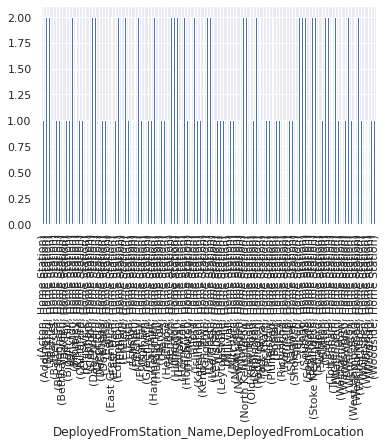

time: 4.95 s (started: 2022-05-14 16:48:52 +00:00)


In [ ]:
# On transforme la table en dataframe et on affiche un graphique pour voir la proportion
camion=pd.DataFrame(camion)
camion.groupby(['DeployedFromStation_Name'])['DeployedFromLocation'].value_counts().plot.bar()

In [ ]:
# On crée une table "Camion2" pour determiner le nombre de camion par Station (1 ou 2)
camion2=camion.groupby(['DeployedFromStation_Name'])['DeployedFromLocation'].size()

time: 2.17 ms (started: 2022-05-14 16:48:57 +00:00)


In [ ]:
# On transforme la table en dataframe et on modifie l'intitulé des colonnes en prévision de la jointure avec df
camion2=pd.DataFrame(camion2)
camion2 = camion2.reset_index()
camion2.reset_index()
camion2.rename(columns={'DeployedFromLocation': 'PumpByStation','DeployedFromStation_Name' : 'IncidentStationGround' }, inplace=True)

time: 4.45 ms (started: 2022-05-14 16:48:57 +00:00)


In [ ]:
# On fait la jointure
df=df.merge(camion2, how = 'left', on = 'IncidentStationGround')

time: 862 ms (started: 2022-05-14 16:48:57 +00:00)


Calcul du nombre de camion de la station de la zone de l'incident en intervention

In [ ]:
# On crée une colonne à df pour afficher le code de la station du camion qui intervient
df['Station_Code_of_ressource']=df['Resource_Code'].astype(str).str[0:3]

code_station = df.groupby(['DeployedFromStation_Name','DeployedFromStation_Code']).size().reset_index()
code_station=pd.DataFrame(code_station)
code_station.columns=['IncidentStationGround','IncidentStationGround_Code','test']
code_station = code_station.drop('test', axis = 1)

df=df.merge(code_station, how = 'left', on = 'IncidentStationGround')

time: 481 ms (started: 2022-05-14 16:48:58 +00:00)


In [ ]:
# On fait une boucle sur les camions de la station de l'incident en intervention
liste2 = []
df['PumpOfIncidentStation_Out']=0
for i in range (300,len(df)):
  a = 0
  for j in range (1,299):
    if df['IncidentStationGround_Code'][i]==df['Station_Code_of_ressource'][i-j]:
      if df['DateAndTimeMobilised'][i]<df['DateAndTimeLeft'][i-j]:
        a = a+1
  liste2.append(a)
  df['PumpOfIncidentStation_Out'][i]=a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


time: 35min 46s (started: 2022-05-14 16:48:58 +00:00)


Création de la colonne du nombre de camion disponible dans la station de la zone de l'incident

In [ ]:
# On créé la colonne du nombre de camion de la station de l'incident de disponible
df['PumpAvailable']=df['PumpByStation']-df['PumpOfIncidentStation_Out']

time: 5.72 ms (started: 2022-05-14 17:24:45 +00:00)


Vérification des données

In [ ]:
df['PumpAvailable'].value_counts()

 1    314695
 2    190743
 0     81603
-1         5
Name: PumpAvailable, dtype: int64

time: 8.8 ms (started: 2022-05-14 17:24:45 +00:00)


In [ ]:
df['PumpAvailable'] = df['PumpAvailable'].replace([-1], 0)

time: 6.57 ms (started: 2022-05-14 17:24:45 +00:00)


**les 300 premieres lignes du df qui n'auront pas de valeurs seront supprimées ultérieurement**

# Quelques Graphiques et visualisations

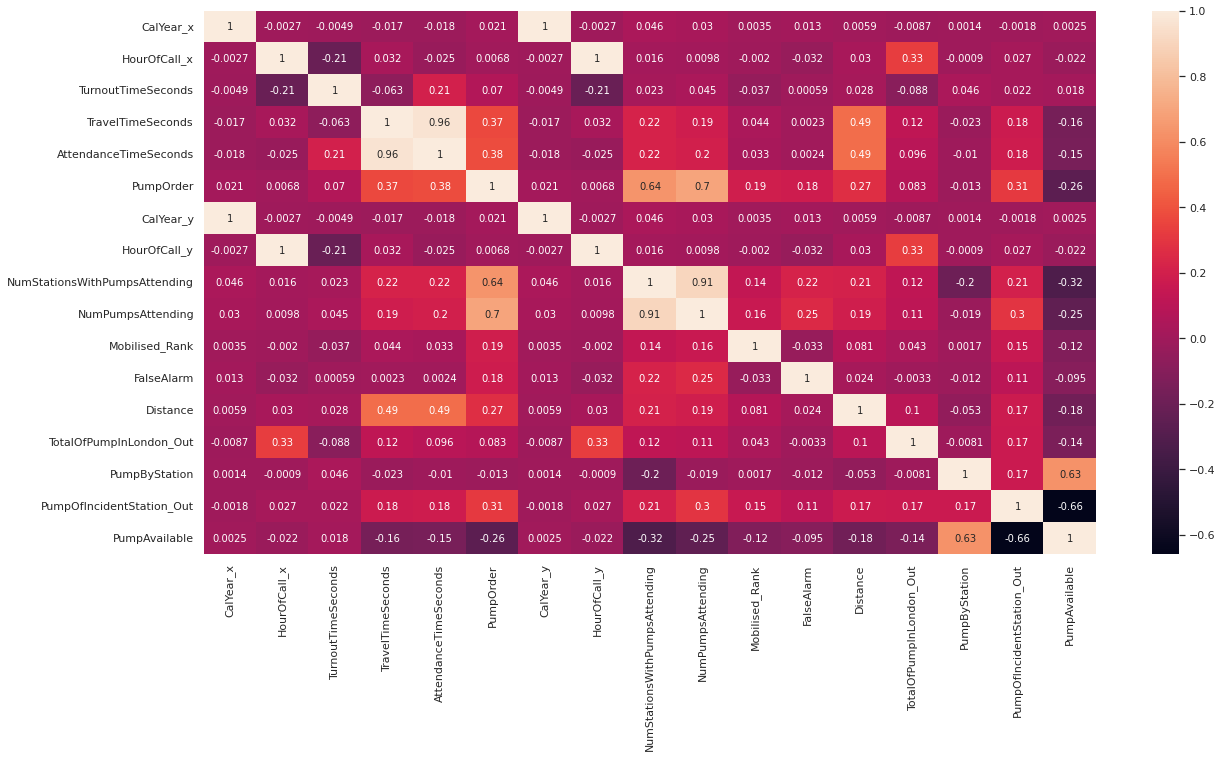

time: 1.71 s (started: 2022-05-14 17:24:45 +00:00)


In [ ]:
# Heatmap de correlation
corr_df = df.corr(method='pearson')
plt.figure(figsize = (20,10))
sns.heatmap(corr_df, annot=True)
plt.show()

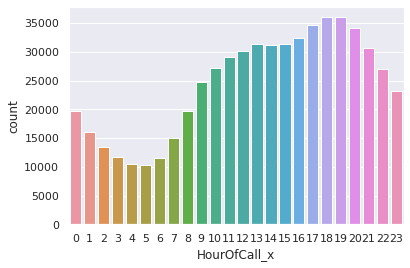

time: 414 ms (started: 2022-05-14 17:24:47 +00:00)


In [ ]:
# Nombre d'appels par heure de la journée
sns.countplot(x=df['HourOfCall_x']);

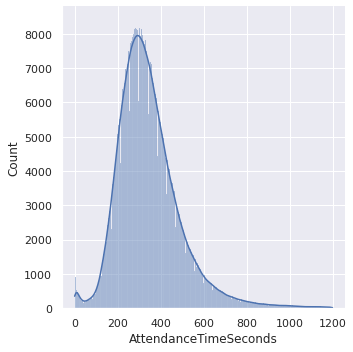

time: 3.89 s (started: 2022-05-14 17:24:47 +00:00)


In [ ]:
sns.displot(data=df, x='AttendanceTimeSeconds', kde=True);

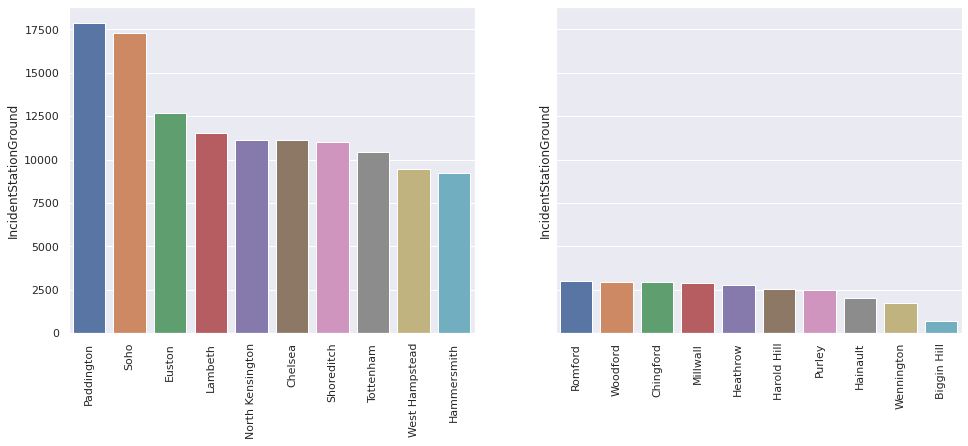

time: 411 ms (started: 2022-05-14 17:24:51 +00:00)


In [ ]:
# Nombre d'appels par caserne (top 10 max et top 10 min)
top10max = df['IncidentStationGround'].value_counts().head(10)
top10min = df['IncidentStationGround'].value_counts().tail(10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)
sns.barplot(x=top10max.index, y = top10max, order = top10max.index, ax =ax1)
sns.barplot(x=top10min.index, y = top10min, order = top10min.index, ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

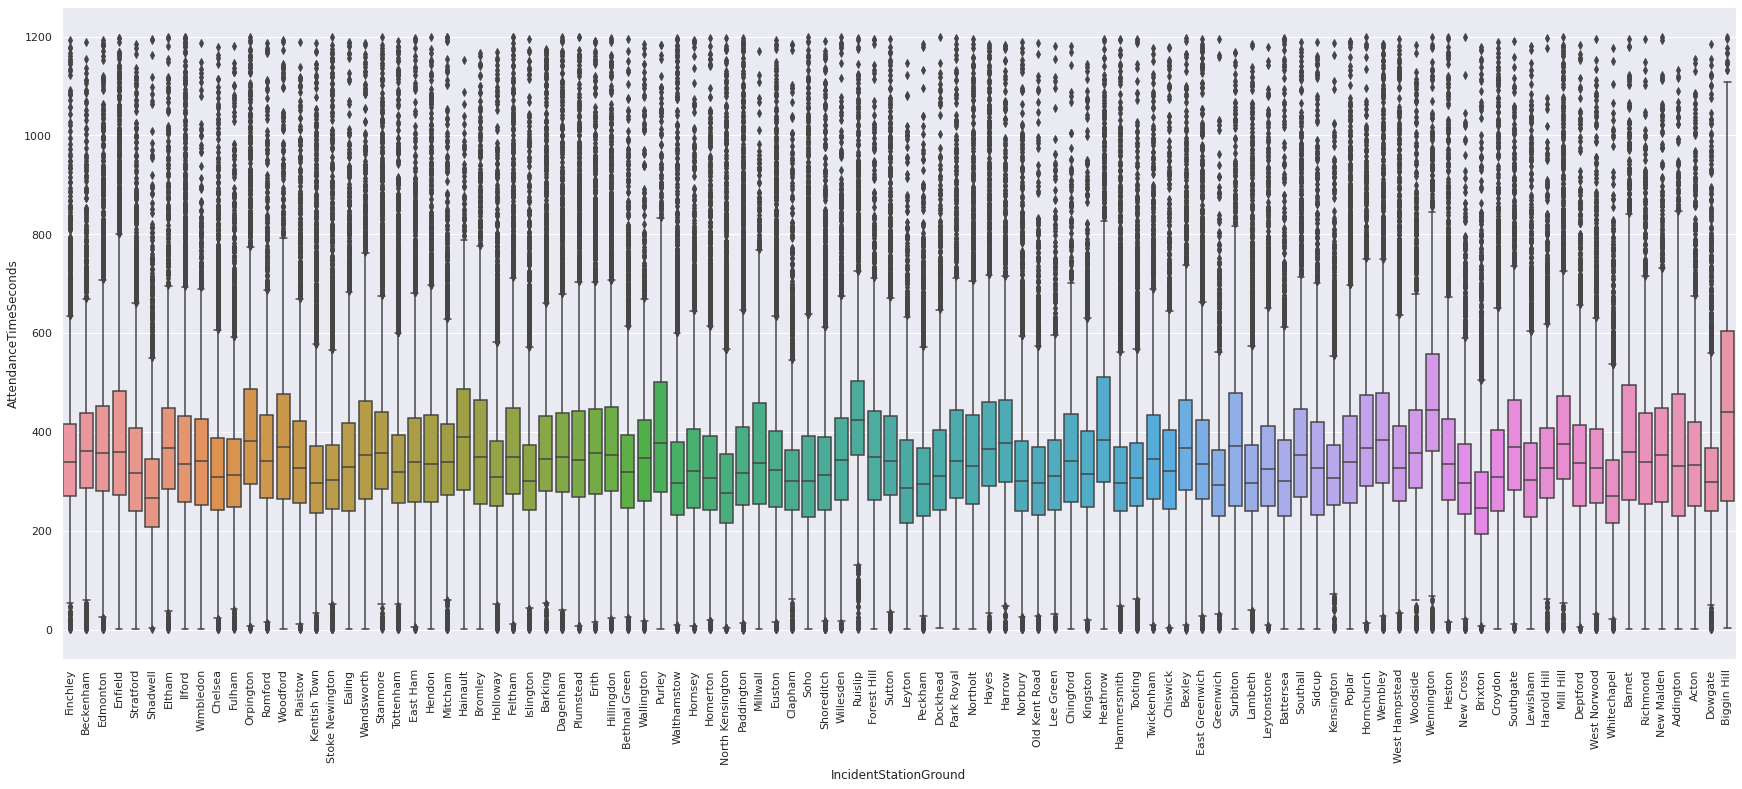

time: 4.39 s (started: 2022-05-14 17:24:51 +00:00)


In [ ]:
# Visualisation sur les intervention avec du retard

df_delay = df.dropna(subset = ['DelayCode_Description'])
plt.figure(figsize=(30,12))
ax = sns.boxplot(x = 'IncidentStationGround',y = 'AttendanceTimeSeconds', data= df_delay);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

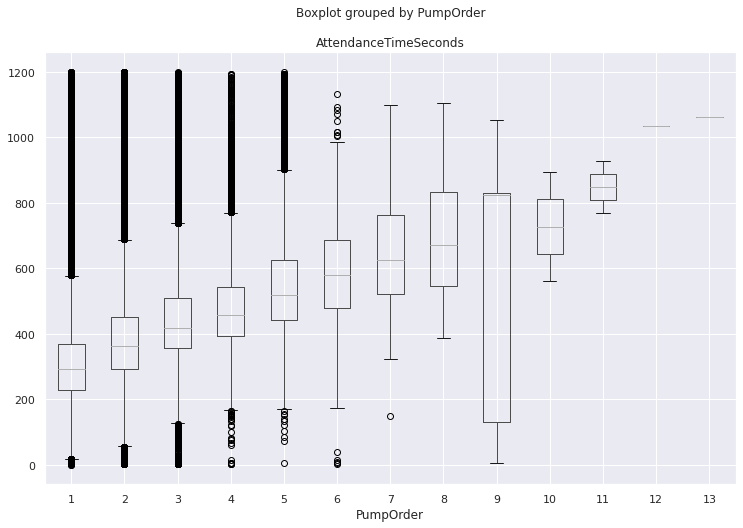

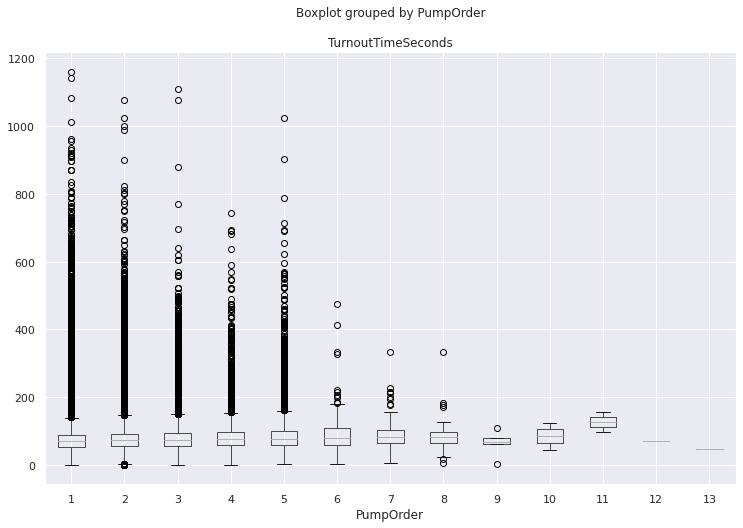

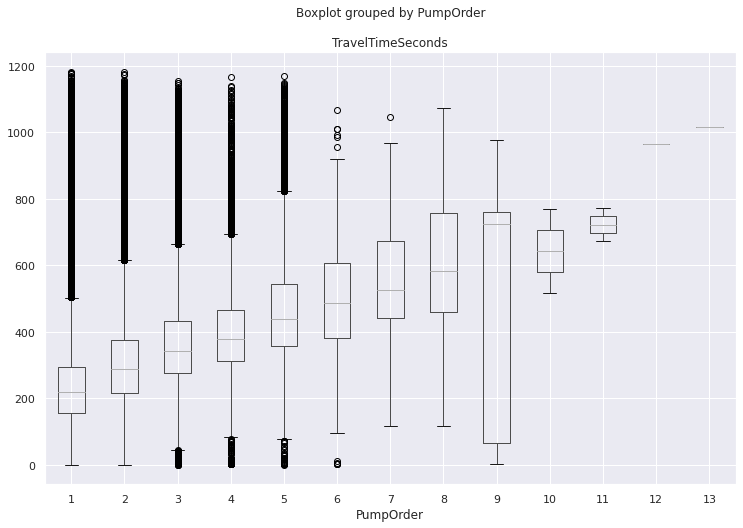

time: 2.51 s (started: 2022-05-14 17:24:56 +00:00)


In [ ]:
# Visu distribution des temps en fonction du "rang" du véhicule
for column in ['AttendanceTimeSeconds', 'TurnoutTimeSeconds', 'TravelTimeSeconds']:
    df.boxplot(column=[column], by='PumpOrder', figsize=(12,8));

# Divers nettoyages

## Suppression lignes incomplètes (suite travaux) et variables non utilisées

In [ ]:
# Supprimer les 300 premières lignes, incomplètes (suite aux travaux sur les nombres de camions)
# df = df[300:]

# supprimer les incidents des 300 premières lignes
inc_suppr = df[:300]['IncidentNumber'].unique().tolist()
df = df[-df['IncidentNumber'].isin(inc_suppr)]

time: 111 ms (started: 2022-05-14 17:24:58 +00:00)


In [ ]:
# Supprimer vagues de mobilisations autres que 1 : on ne travaillera que sur les 1ères vagues de véhicules

df = df[df['Mobilised_Rank'] == 1]

time: 113 ms (started: 2022-05-14 17:24:58 +00:00)


In [ ]:
# Supprimer DateAndTimeLeft : n'a plus aucune utilité (était nécessaire pour la partie "nombre de véhicules en intervention")

df = df.drop('DateAndTimeLeft', axis= 1)

time: 98 ms (started: 2022-05-14 17:24:59 +00:00)


## Contrôle de vraisemblance Distance vs TravelTimeSeconds

L'objectif ici sera de vérifier la vraisemblance entre les temps de trajets (TravelTimeSeconds) et les Distances, et traiter les anomalies s'il y en a.
Nous allons commencer par présenter un nuage de points des temps de trajet en fonction des distances.

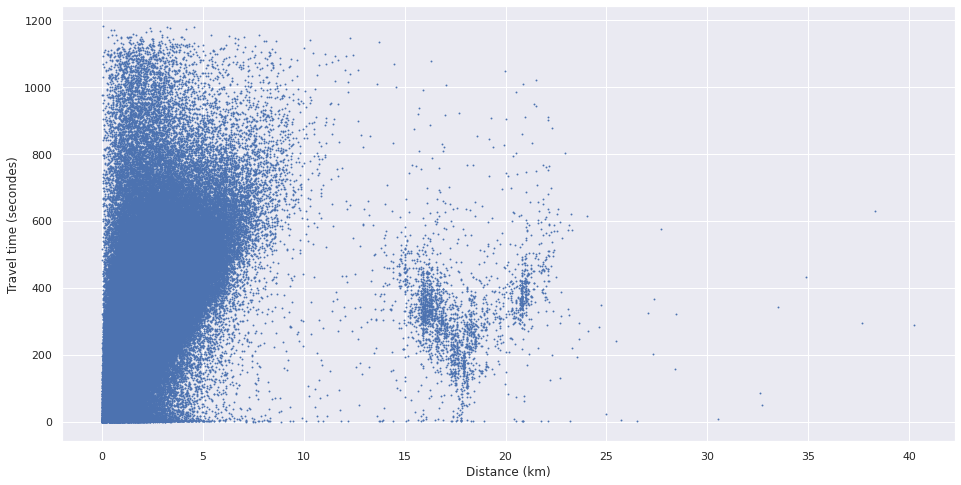

time: 827 ms (started: 2022-05-14 17:24:59 +00:00)


In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(df['Distance'], df['TravelTimeSeconds'], s= 0.8)
plt.xlabel('Distance (km)')
plt.ylabel('Travel time (secondes)');

Visiblement, des valeurs temps/distances sont aberrantes, notamment dans les observations avec des distances supérieures à 12km (le nuage de points le plus à droite)

Nous allons ajouter à notre tableau, une variables calculant la vitesse en km/heure.

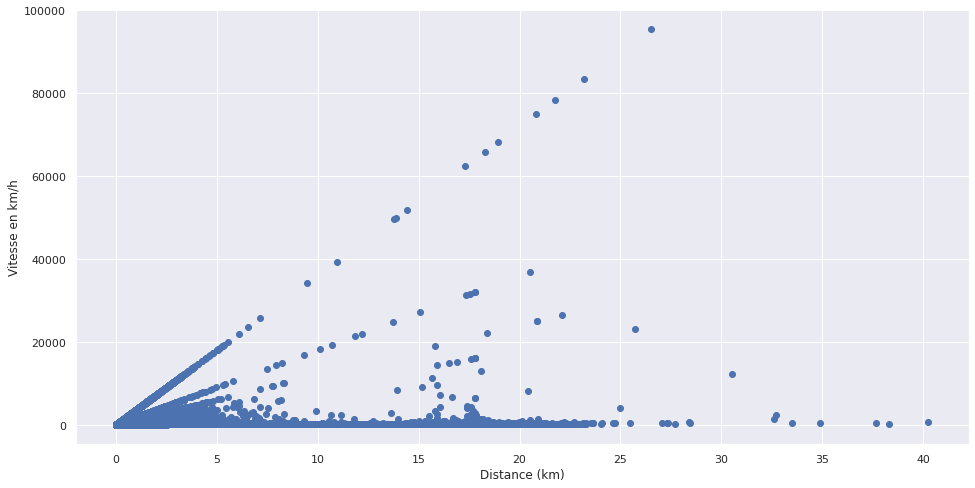

time: 2.12 s (started: 2022-05-14 17:24:59 +00:00)


In [ ]:
# Création d'une colonne calculant la vitesse de circulation du véhicule en km/h
df['speed_km_per_hour'] = 3600 * df['Distance']/df['TravelTimeSeconds']

# Visu vitesse km/h en fonction de la distance
plt.figure(figsize=(16,8))
plt.scatter(df['Distance'], df['speed_km_per_hour'])
plt.xlabel('Distance (km)')
plt.ylabel('Vitesse en km/h');

Nous avons effectivement des valeurs aberrantes temps vs distances !!

Le seul choix s'offrant à nous est de supprimer certaines observations (pas d'éléments à ce niveau, pour envisager des corrections).

Il nous faut déjà déterminer à partir de quelle vitesse en km/h, on va considérer que les observations sont des anomalies.

Pour nous aider à déterminer ce seuil, nous allons représenter graphiquement, une courbe présentant le nombre d'observations pour lesquelles la vitesse en km/h est supérieure à un seuil défini en abscisse.

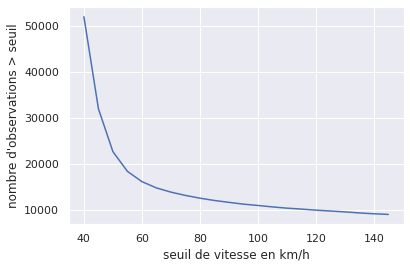

time: 452 ms (started: 2022-05-14 17:25:02 +00:00)


In [ ]:
# Visu du nombre d'observations pour lesquelles vitesse > seuil (sur plage 40 à 145 km/h, par pas de 5 km/h)

# Définition du seuil
speed_threshold = list(range(40,150,5))

# Initialisation liste du nombre des observations
obs_over_speed = []

# Boucle pour calculer le nb d'observations > seuil
for speed_max in speed_threshold:
    obs_over_speed.append(len(df[df['speed_km_per_hour'] > speed_max]))

# Tracer la courbe    
plt.plot(speed_threshold, obs_over_speed)
plt.xlabel('seuil de vitesse en km/h')
plt.ylabel("nombre d'observations > seuil");

Compte tenu de l'environnement urbain dans lequel les véhicules interviennent, de la forme de la courbe ("coude" aux environs de 60 km/h), et du relativement faible nombre d'observations supérieures à ce seuil, nous allons retenir un **seuil de 60 km/h**.

Toutes les observations présentant des vitesses calculées supérieures à 60 km/h seront donc supprimées.

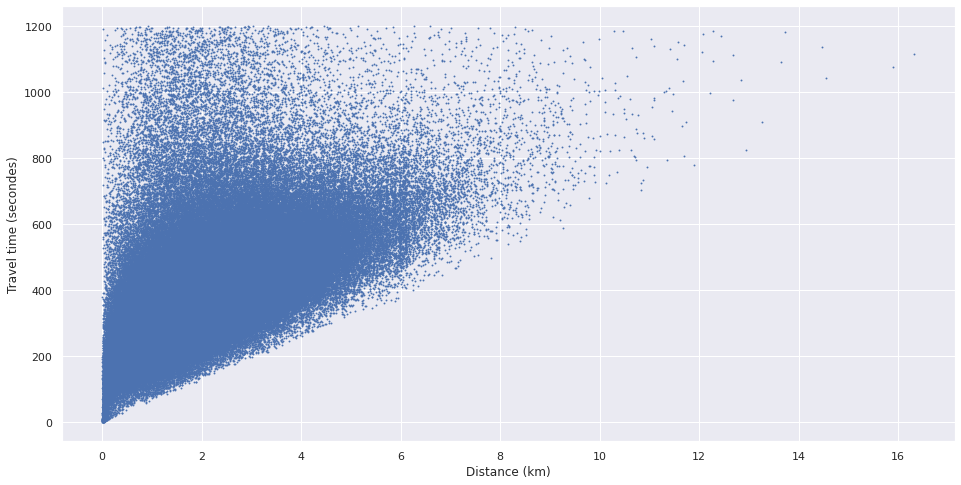

time: 1.02 s (started: 2022-05-14 17:25:02 +00:00)


In [ ]:
# # supprimer les lignes dont les vitesses sont > 60 km/h
# df = df[df['speed_km_per_hour'] <= 60]

# supprimer les incidents comportant des véhicules dont les vitesses sont > 60 km/h
liste_incidents_60 = df[df['speed_km_per_hour'] > 60]['IncidentNumber'].unique().tolist()
df = df[-df['IncidentNumber'].isin(liste_incidents_60)]

# Supprimer la colonne de vitesse en km/h (variable temporaire)
df = df.drop('speed_km_per_hour', axis=1)

# Visu (contrôle) attendance time en fonction de la distance
plt.figure(figsize=(16,8))
plt.scatter(df['Distance'], df['AttendanceTimeSeconds'], s= 0.8)
plt.xlabel('Distance (km)')
plt.ylabel('Travel time (secondes)');

## Tri dans les variables format datetime

Nous allons d'abord supprimer toutes les variables liées à DateOfCall : comme nous l'avons vu, cette information présente des incohérences par rapport aux autres variables temporelles (ex : des véhicules sont mobilisés sur l'incident avant d'avoir été appelés ?!)

Egalement évoqué précédemment, nous définissons DateAndTimeMobilised comme référence temporelle pour situer l'incident.

In [ ]:
# Supprimer toutes les variables liées à Date of Call

# Liste des variables
col_remove = ['CalYear_x',
              'HourOfCall_x',
              'DateOfCall',
              'CalYear_y',
              'TimeOfCall',
              'HourOfCall_y']

# Suppression
df = df.drop(col_remove, axis = 1)

time: 76 ms (started: 2022-05-14 17:25:03 +00:00)


In [ ]:
# créer les variables de temps, basées sur DateAndTimeMobilised
# année, mois, jour de la semaine, heure (sans minutes & secondes)

df['year'] = df['DateAndTimeMobilised'].dt.year
df['month'] = df['DateAndTimeMobilised'].dt.month
df['day'] = df['DateAndTimeMobilised'].dt.day
df['weekday'] = df['DateAndTimeMobilised'].dt.day_name()
df['hour'] = df['DateAndTimeMobilised'].dt.hour

time: 313 ms (started: 2022-05-14 17:25:03 +00:00)


Certaines variables au format datetime ne seront plus utiles (DateAndTimeMobile et DateAndTimeArrived), nous les supprimons.

Nous conservons en revanche la variable DateAndTimeMobilised (pour le cas où elle pourrait être utilisée dans les modèles de Machine Learning)

In [ ]:
# suppression des variables datetime inutiles

df = df.drop('DateAndTimeMobile', axis = 1)
df = df.drop('DateAndTimeArrived', axis = 1)

time: 315 ms (started: 2022-05-14 17:25:04 +00:00)


# Ajout de variables externes

## Variables météorologiques

Nous ajoutons à la base, les conditions météorologiques, qui nous semblent être un facteur externe pouvant impacter les temps de trajet.

In [ ]:
df.head()

,IncidentNumber,Resource_Code,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance,TotalOfPumpInLondon_Out,PumpByStation,Station_Code_of_ressource,IncidentStationGround_Code,PumpOfIncidentStation_Out,PumpAvailable,year,month,day,weekday,hour
300,000412-01012018,F261,2018-01-01 18:09:04,74,191,265,F26,Bethnal Green,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Park,Open land/water - nearest gazetteer location,Bethnal Green,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.629,2,1,F26,F26,0,1,2018,1,1,Monday,18
301,000413-01012018,G272,2018-01-01 18:13:36,85,109,194,G27,North Kensington,Home Station,1,No delay,Pump Ladder,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,North Kensington,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.849,3,2,G27,G27,0,2,2018,1,1,Monday,18
302,000415-01012018,G301,2018-01-01 18:17:25,72,167,239,G30,Wembley,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Tree scrub,On land associated with building,Wembley,1,1,1,Fire,Secondary Fire,0,1.319,4,2,G30,G30,0,2,2018,1,1,Monday,18
303,000417-01012018,G291,2018-01-01 18:25:44,123,364,487,G29,Park Royal,Home Station,1,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,1.296,3,2,G29,G30,1,1,2018,1,1,Monday,18
304,000417-01012018,G281,2018-01-01 18:25:44,40,453,493,G28,Willesden,Home Station,2,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,2.728,4,2,G28,G30,1,1,2018,1,1,Monday,18


time: 24.3 ms (started: 2022-05-14 17:25:04 +00:00)


In [ ]:
# On transforme la date de mobilisation au format 'An-Mois-Jour et heure'

df['date'] = df['DateAndTimeMobilised'].dt.strftime('%Y-%m-%d %H')

time: 2.12 s (started: 2022-05-14 17:25:04 +00:00)


In [ ]:
df.head()

,IncidentNumber,Resource_Code,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance,TotalOfPumpInLondon_Out,PumpByStation,Station_Code_of_ressource,IncidentStationGround_Code,PumpOfIncidentStation_Out,PumpAvailable,year,month,day,weekday,hour,date
300,000412-01012018,F261,2018-01-01 18:09:04,74,191,265,F26,Bethnal Green,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Park,Open land/water - nearest gazetteer location,Bethnal Green,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.629,2,1,F26,F26,0,1,2018,1,1,Monday,18,2018-01-01 18
301,000413-01012018,G272,2018-01-01 18:13:36,85,109,194,G27,North Kensington,Home Station,1,No delay,Pump Ladder,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,North Kensington,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.849,3,2,G27,G27,0,2,2018,1,1,Monday,18,2018-01-01 18
302,000415-01012018,G301,2018-01-01 18:17:25,72,167,239,G30,Wembley,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Tree scrub,On land associated with building,Wembley,1,1,1,Fire,Secondary Fire,0,1.319,4,2,G30,G30,0,2,2018,1,1,Monday,18,2018-01-01 18
303,000417-01012018,G291,2018-01-01 18:25:44,123,364,487,G29,Park Royal,Home Station,1,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,1.296,3,2,G29,G30,1,1,2018,1,1,Monday,18,2018-01-01 18
304,000417-01012018,G281,2018-01-01 18:25:44,40,453,493,G28,Willesden,Home Station,2,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,2.728,4,2,G28,G30,1,1,2018,1,1,Monday,18,2018-01-01 18


time: 26.3 ms (started: 2022-05-14 17:25:06 +00:00)


In [ ]:
# On appelle les dataframe des données météo

file = inputs_rep + 'Weather London 2018-01-01 to 2019-12-31.csv'
meteo1 = pd.read_csv(file)

file = inputs_rep + 'Weather London 2020-01-01 to 2021-12-31.csv'
meteo2= pd.read_csv(file)

time: 826 ms (started: 2022-05-14 17:25:06 +00:00)


In [ ]:
meteo2.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,london,2020-01-01T00:00:00,5.6,3.8,3.1,84.00,NaN,NaN,NaN,NaN,NaN,NaN,8.6,139.0,1030.9,0.0,6.2,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999..."
1,london,2020-01-01T01:00:00,4.6,3.0,2.8,88.15,NaN,NaN,NaN,NaN,NaN,NaN,7.1,121.0,1030.7,0.0,3.0,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999..."
2,london,2020-01-01T02:00:00,4.5,3.3,2.7,87.54,NaN,NaN,NaN,NaN,NaN,NaN,5.7,111.0,1030.2,0.6,3.1,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999..."
3,london,2020-01-01T03:00:00,4.6,2.9,2.7,86.92,NaN,NaN,NaN,NaN,NaN,NaN,7.4,99.0,1030.0,0.7,4.5,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999..."
4,london,2020-01-01T04:00:00,4.5,2.7,2.9,88.76,NaN,NaN,NaN,NaN,NaN,NaN,7.9,109.0,1030.0,0.7,4.7,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999..."


time: 20.8 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On transforme la date de relevé au format 'An-Mois-Jours et heures'
meteo1['date'] = pd.to_datetime(meteo1['datetime']).dt.strftime('%Y-%m-%d %H')
meteo2['date'] = pd.to_datetime(meteo2['datetime']).dt.strftime('%Y-%m-%d %H')

time: 152 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On concatene les 2 df meteo
meteo = pd.concat([meteo1, meteo2])
meteo.shape

(35064, 25)

time: 12.9 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
meteo.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
0,london,2018-01-01T00:00:00,7.6,7.6,3.6,75.82,0.34,NaN,NaN,NaN,NaN,51.3,0.2,254.0,997.4,0.6,38.1,NaN,NaN,0,NaN,Rain,rain,"03680099999,03672099999,03781099999,0377209999...",2018-01-01 00
1,london,2018-01-01T01:00:00,7.5,3.6,3.6,76.34,NaN,NaN,NaN,NaN,NaN,NaN,27.1,254.0,998.4,0.3,31.5,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999...",2018-01-01 01
2,london,2018-01-01T02:00:00,6.6,2.9,3.1,78.37,NaN,NaN,NaN,NaN,NaN,NaN,22.8,250.0,999.6,0.3,31.9,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999...",2018-01-01 02
3,london,2018-01-01T03:00:00,6.5,2.8,2.6,76.16,NaN,NaN,NaN,NaN,NaN,NaN,22.3,244.0,999.6,0.3,38.9,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999...",2018-01-01 03
4,london,2018-01-01T04:00:00,6.1,2.3,2.8,79.41,NaN,NaN,NaN,NaN,NaN,NaN,21.6,233.0,999.6,0.4,36.3,NaN,NaN,0,NaN,Clear,clear-night,"03769099999,03680099999,03672099999,0378109999...",2018-01-01 04


time: 31.4 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On vérifie les variables 'nulles'
meteo.isnull().sum()

name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip              32596
precipprob          35064
preciptype          35064
snow                35064
snowdepth           34890
windgust            30636
windspeed               8
winddir                15
sealevelpressure      161
cloudcover             24
visibility              0
solarradiation      35064
solarenergy         35064
uvindex                 0
severerisk          35064
conditions              0
icon                    0
stations                0
date                    0
dtype: int64

time: 21.2 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
meteo.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'date'],
      dtype='object')

time: 4.19 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On définit les colonnes à supprimer et celles à conserver
colonne_à_supp = ['name', 
                  'datetime', 
                  #'temp', 
                  'feelslike', 
                  'dew', 
                  'humidity', 
                  #'precip',
                  'precipprob', 
                  'preciptype', 
                  'snow', 
                  'snowdepth', 
                  'windgust',
                  'windspeed', 
                  'winddir', 
                  'sealevelpressure', 
                  #'cloudcover', 
                  #'visibility',
                  'solarradiation', 
                  'solarenergy', 
                  'uvindex', 
                  'severerisk', 
                  #'conditions',
                  #'icon', 
                  'stations', 
                  #'date'
                  ]

# On supprimer les variables
meteo=meteo.drop(colonne_à_supp, axis = 1)

time: 16.7 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
meteo.head()

,temp,precip,cloudcover,visibility,conditions,icon,date
0,7.6,0.34,0.6,38.1,Rain,rain,2018-01-01 00
1,7.5,NaN,0.3,31.5,Clear,clear-night,2018-01-01 01
2,6.6,NaN,0.3,31.9,Clear,clear-night,2018-01-01 02
3,6.5,NaN,0.3,38.9,Clear,clear-night,2018-01-01 03
4,6.1,NaN,0.4,36.3,Clear,clear-night,2018-01-01 04


time: 13.2 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On remplace les Nan des données de précipitation
meteo = meteo.fillna(0)
meteo.isnull().sum()

temp          0
precip        0
cloudcover    0
visibility    0
conditions    0
icon          0
date          0
dtype: int64

time: 18 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
meteo.head()

,temp,precip,cloudcover,visibility,conditions,icon,date
0,7.6,0.34,0.6,38.1,Rain,rain,2018-01-01 00
1,7.5,0.00,0.3,31.5,Clear,clear-night,2018-01-01 01
2,6.6,0.00,0.3,31.9,Clear,clear-night,2018-01-01 02
3,6.5,0.00,0.3,38.9,Clear,clear-night,2018-01-01 03
4,6.1,0.00,0.4,36.3,Clear,clear-night,2018-01-01 04


time: 16.2 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
# On merge les dataframe df et meteo sur la variable date (format : An-Mois-Jour et heure)
df=df.merge(meteo, how = 'left', on = 'date')

time: 792 ms (started: 2022-05-14 17:25:07 +00:00)


In [ ]:
df.head()

,IncidentNumber,Resource_Code,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance,TotalOfPumpInLondon_Out,PumpByStation,Station_Code_of_ressource,IncidentStationGround_Code,PumpOfIncidentStation_Out,PumpAvailable,year,month,day,weekday,hour,date,temp,precip,cloudcover,visibility,conditions,icon
0,000412-01012018,F261,2018-01-01 18:09:04,74,191,265,F26,Bethnal Green,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Park,Open land/water - nearest gazetteer location,Bethnal Green,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.629,2,1,F26,F26,0,1,2018,1,1,Monday,18,2018-01-01 18,7.0,0.3,0.2,29.0,Rain,rain
1,000413-01012018,G272,2018-01-01 18:13:36,85,109,194,G27,North Kensington,Home Station,1,No delay,Pump Ladder,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,North Kensington,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.849,3,2,G27,G27,0,2,2018,1,1,Monday,18,2018-01-01 18,7.0,0.3,0.2,29.0,Rain,rain
2,000415-01012018,G301,2018-01-01 18:17:25,72,167,239,G30,Wembley,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Tree scrub,On land associated with building,Wembley,1,1,1,Fire,Secondary Fire,0,1.319,4,2,G30,G30,0,2,2018,1,1,Monday,18,2018-01-01 18,7.0,0.3,0.2,29.0,Rain,rain
3,000417-01012018,G291,2018-01-01 18:25:44,123,364,487,G29,Park Royal,Home Station,1,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,1.296,3,2,G29,G30,1,1,2018,1,1,Monday,18,2018-01-01 18,7.0,0.3,0.2,29.0,Rain,rain
4,000417-01012018,G281,2018-01-01 18:25:44,40,453,493,G28,Willesden,Home Station,2,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,2.728,4,2,G28,G30,1,1,2018,1,1,Monday,18,2018-01-01 18,7.0,0.3,0.2,29.0,Rain,rain


time: 25.4 ms (started: 2022-05-14 17:25:08 +00:00)


In [ ]:
df = df.fillna(0)

time: 3.03 s (started: 2022-05-14 17:25:08 +00:00)


In [ ]:
df=df.drop('date', axis = 1)

time: 247 ms (started: 2022-05-14 17:25:11 +00:00)


In [ ]:
df.isnull().sum()

IncidentNumber                   0
Resource_Code                    0
DateAndTimeMobilised             0
TurnoutTimeSeconds               0
TravelTimeSeconds                0
AttendanceTimeSeconds            0
DeployedFromStation_Code         0
DeployedFromStation_Name         0
DeployedFromLocation             0
PumpOrder                        0
DelayCode_Description            0
Appliance                        0
PropertyCategory                 0
PropertyType                     0
AddressQualifier                 0
IncidentStationGround            0
NumStationsWithPumpsAttending    0
NumPumpsAttending                0
Mobilised_Rank                   0
IncidentType                     0
IncidentCategory                 0
FalseAlarm                       0
Distance                         0
TotalOfPumpInLondon_Out          0
PumpByStation                    0
Station_Code_of_ressource        0
IncidentStationGround_Code       0
PumpOfIncidentStation_Out        0
PumpAvailable       

time: 457 ms (started: 2022-05-14 17:25:11 +00:00)


Quelques analyses et graphes pour observer les variations

In [ ]:
df['icon'].value_counts()

clear-day              310789
clear-night            183824
rain                    32032
wind                    16483
partly-cloudy-day        1832
fog                      1016
cloudy                    996
partly-cloudy-night       816
snow                       77
0                          61
Name: icon, dtype: int64

time: 33.4 ms (started: 2022-05-14 17:25:12 +00:00)


In [ ]:
df['conditions'].value_counts()

Clear                     511819
Rain                       31712
Partially cloudy            2857
Overcast                    1080
Rain, Partially cloudy       182
Rain, Fog                    138
Snow                          77
0                             61
Name: conditions, dtype: int64

time: 30.9 ms (started: 2022-05-14 17:25:12 +00:00)


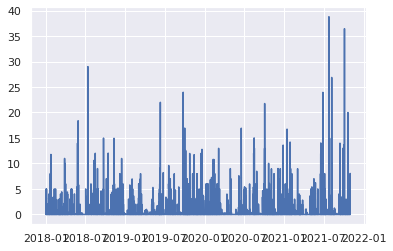

time: 468 ms (started: 2022-05-14 17:25:12 +00:00)


In [ ]:
plt.plot('DateAndTimeMobilised', 'precip', data=df)

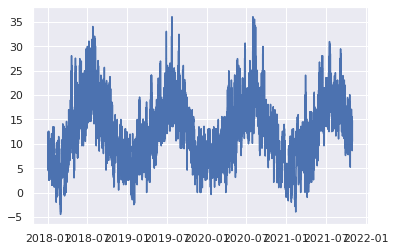

time: 505 ms (started: 2022-05-14 17:25:12 +00:00)


In [ ]:
plt.plot('DateAndTimeMobilised', 'temp', data=df)

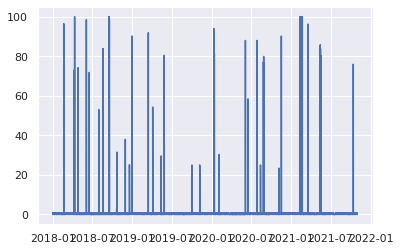

time: 465 ms (started: 2022-05-14 17:25:13 +00:00)


In [ ]:
plt.plot('DateAndTimeMobilised', 'cloudcover', data=df)

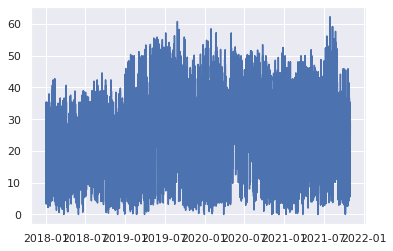

time: 542 ms (started: 2022-05-14 17:25:13 +00:00)


In [ ]:
plt.plot('DateAndTimeMobilised', 'visibility', data=df)

In [ ]:
# Suppression des incidents dont les conditions meteo sont à zéro
liste_incidents_meteo_null = df[df['conditions'] ==0]['IncidentNumber'].unique().tolist()
df = df[-df['IncidentNumber'].isin(liste_incidents_meteo_null)]

time: 148 ms (started: 2022-05-14 17:25:14 +00:00)


## Variables congés (workingday et school_holidays)

Nous estimons que les jours de congés peuvent avoir des impact sur le trafic routier (transports scolaires, véhicules personnels en déplacements, etc...), nous les ajoutons également à la base de travail.

In [ ]:
df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised']).dt.date
df['DateAndTimeMobilised']=pd.to_datetime(df['DateAndTimeMobilised'])

time: 299 ms (started: 2022-05-14 17:25:14 +00:00)


In [ ]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            547916, 547917, 547918, 547919, 547920, 547921, 547922, 547923,
            547924, 547925],
           dtype='int64', length=547865)

time: 7.54 ms (started: 2022-05-14 17:25:14 +00:00)


In [ ]:
uni=UnitedKingdom()
df['workingday']=''
for i in tqdm.tqdm(df.index):
  df.loc[i,'workingday']=int(uni.is_working_day(date(df.loc[i,'year'],df.loc[i,'month'],df.loc[i,'day'])))

100%|██████████| 547865/547865 [1:01:53<00:00, 147.53it/s]

time: 1h 1min 53s (started: 2022-05-14 17:25:14 +00:00)


In [ ]:
file = inputs_rep + 'holidays.csv'
holidays=pd.read_csv(file, sep=';')

holidays=holidays[['date']]
holidays.date=pd.to_datetime(holidays.date)
holidays.rename(columns={'date':'DateAndTimeMobilised'},inplace=True)

time: 368 ms (started: 2022-05-14 18:27:08 +00:00)


In [ ]:
holidays['school_holidays']=1

time: 1.15 ms (started: 2022-05-14 18:27:08 +00:00)


In [ ]:
df=df.merge(holidays, how = 'left', on = 'DateAndTimeMobilised')

time: 899 ms (started: 2022-05-14 18:27:08 +00:00)


In [ ]:
df.school_holidays=df.school_holidays.fillna(0)
df.school_holidays=df.school_holidays.astype('object')

time: 24.1 ms (started: 2022-05-14 18:27:09 +00:00)


## Variable de densité du trafic londonien (congestion_rate)

Nous allons ajouter à la base, une variable indiquant le taux de congestion (densité du trafic) sur la tranche horaire de l'incident

### Récupérer les données de trafic

Les données que nous avons trouvées ne sont malheureusement pas détaillées par date précise, et nous n'avons pas de détail sur la zone géographique précisément couverte, mais nous pouvons supposer qu'elles concerne une zone similaire à celle couverte par les pompiers de Londres.

Elles sont néanmoins intéressantes à considérer, puisque donnant pour une année, un taux moyen de congestion du trafic, par heure, sur chacun des jours de la semaine. 

Source :
[London Traffic (tomtom.com)](https://www.tomtom.com/en_gb/traffic-index/london-traffic/)
-> Voir les taux du pavé de synthèse "WEEKLY TRAFFIC CONGESTION BY TIME OF DAY"

Seules les valeurs pour les 3 dernières années sont disponibles (1 tableau pour chacune des 3 années 2019 / 2020 / 2021).

Il nous a donc fallu prendre une hypothèse pour l'année 2018 : nous retiendrons les mêmes taux que l'année 2019.

Voir ci-dessous pour exemple, les valeurs pour 2021 (plus le taux est élevé, plus la circulation est dense).

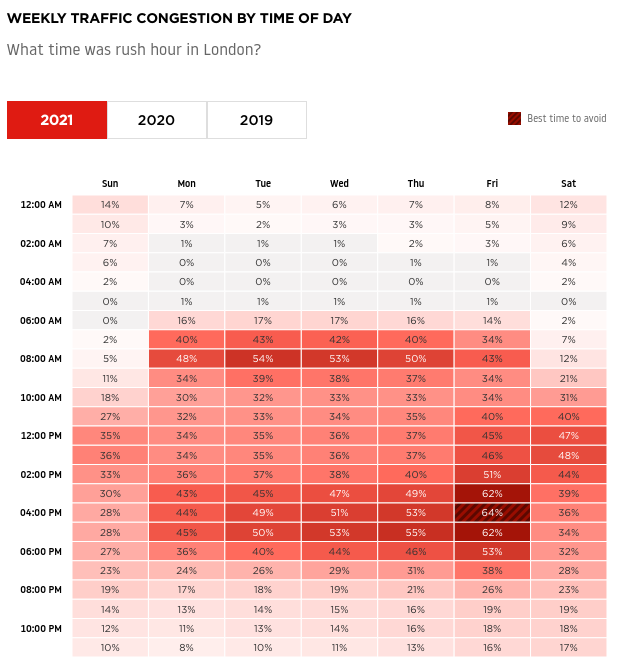

La méthodologie pour récupérer ces informations à été de copier / coller les données dans un tableur, les mettre en forme pour les enregistrer ensuite dans un fichier au format csv, que nous importons directement à l'aide de Pandas, et que nous fusionnons avec notre base.

In [ ]:
# Lecture du csv
file = inputs_rep + 'london_congestion.csv'
traffic = pd.read_csv(file, sep=';')

# Visu de la taille du dataframe créé
print('Taille du DataFrame traffic :', traffic.shape, '\n')
# 672 lignes = 24h/j * 7 j/sem * 4 années

# Aperçu des données et détail des variables
display(traffic.head())
print('')
traffic.info()

Taille du DataFrame traffic : (672, 5) 



,congestion,hour,day_nb,day,year
0,"0,14",0,1,Sunday,2021
1,"0,1",1,1,Sunday,2021
2,"0,07",2,1,Sunday,2021
3,"0,06",3,1,Sunday,2021
4,"0,02",4,1,Sunday,2021



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   congestion  672 non-null    object
 1   hour        672 non-null    int64 
 2   day_nb      672 non-null    int64 
 3   day         672 non-null    object
 4   year        672 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 26.4+ KB
time: 243 ms (started: 2022-05-14 18:27:09 +00:00)


### Fusionner les tables

In [ ]:
# Préparation de la fusion

# créer colonne commune dans les 2 tables = concaténation de year, weekday et hour
traffic['congestion_key'] = traffic['year'].astype(str)+traffic['day']+traffic['hour'].astype(str)
df['congestion_key'] = df['year'].astype(str)+df['weekday']+df['hour'].astype(str)

# supprimer les colonnes inutiles de traffic
traffic = traffic.drop(['year', 'hour', 'day', 'day_nb'], axis=1)

# renommer colonne contenant le taux de congestion de la plage horaire
traffic = traffic.rename({'congestion' : 'congestion_rate'}, axis = 1)

# convertir la variable taux de congestion en format float
traffic['congestion_rate'] = traffic['congestion_rate'].str.replace(',', '.').astype(float)

# Extrait dataframe avant fusion
traffic.head()


,congestion_rate,congestion_key
0,0.14,2021Sunday0
1,0.10,2021Sunday1
2,0.07,2021Sunday2
3,0.06,2021Sunday3
4,0.02,2021Sunday4


time: 706 ms (started: 2022-05-14 18:27:10 +00:00)


In [ ]:
# Fusion des tables

df = df.merge(right = traffic, how = 'left', on = 'congestion_key')
df = df.drop('congestion_key', axis = 1)
print(df.shape)
df.head()


(547865, 43)


,IncidentNumber,Resource_Code,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance,TotalOfPumpInLondon_Out,PumpByStation,Station_Code_of_ressource,IncidentStationGround_Code,PumpOfIncidentStation_Out,PumpAvailable,year,month,day,weekday,hour,temp,precip,cloudcover,visibility,conditions,icon,workingday,school_holidays,congestion_rate
0,000412-01012018,F261,2018-01-01,74,191,265,F26,Bethnal Green,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Park,Open land/water - nearest gazetteer location,Bethnal Green,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.629,2,1,F26,F26,0,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
1,000413-01012018,G272,2018-01-01,85,109,194,G27,North Kensington,Home Station,1,No delay,Pump Ladder,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,North Kensington,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.849,3,2,G27,G27,0,2,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
2,000415-01012018,G301,2018-01-01,72,167,239,G30,Wembley,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Tree scrub,On land associated with building,Wembley,1,1,1,Fire,Secondary Fire,0,1.319,4,2,G30,G30,0,2,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
3,000417-01012018,G291,2018-01-01,123,364,487,G29,Park Royal,Home Station,1,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,1.296,3,2,G29,G30,1,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
4,000417-01012018,G281,2018-01-01,40,453,493,G28,Willesden,Home Station,2,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,2.728,4,2,G28,G30,1,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47


time: 565 ms (started: 2022-05-14 18:27:10 +00:00)


---
**Note** :

   les variables weekday et hour pourront être supprimées des modèles de Machine Learning car la variable "congestion_rate" ici créée contient déjà ces 2 notions.
  
---

# Sauvegarde des données

Les travaux de nettoyage et créations de variables étant terminés, on peut conserver une copie de notre dataframe, dans un fichier au format pkl.

In [ ]:
# chemin + nom du fichier de sortie
file = outputs_rep + output_file

# Création de la sauvegarde
df.to_pickle(file)

time: 1.17 s (started: 2022-05-14 18:27:11 +00:00)


# Résumé de la base nettoyée

In [ ]:
# Valeurs manquantes
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

time: 951 ms (started: 2022-05-14 18:27:12 +00:00)


In [ ]:
# afficher les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547865 entries, 0 to 547864
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 547865 non-null  object        
 1   Resource_Code                  547865 non-null  object        
 2   DateAndTimeMobilised           547865 non-null  datetime64[ns]
 3   TurnoutTimeSeconds             547865 non-null  int64         
 4   TravelTimeSeconds              547865 non-null  int64         
 5   AttendanceTimeSeconds          547865 non-null  int64         
 6   DeployedFromStation_Code       547865 non-null  object        
 7   DeployedFromStation_Name       547865 non-null  object        
 8   DeployedFromLocation           547865 non-null  object        
 9   PumpOrder                      547865 non-null  int64         
 10  DelayCode_Description          547865 non-null  object        
 11  

In [ ]:
# afficher un aperçu des données
df.head()

,IncidentNumber,Resource_Code,DateAndTimeMobilised,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Mobilised_Rank,IncidentType,IncidentCategory,FalseAlarm,Distance,TotalOfPumpInLondon_Out,PumpByStation,Station_Code_of_ressource,IncidentStationGround_Code,PumpOfIncidentStation_Out,PumpAvailable,year,month,day,weekday,hour,temp,precip,cloudcover,visibility,conditions,icon,workingday,school_holidays,congestion_rate
0,000412-01012018,F261,2018-01-01,74,191,265,F26,Bethnal Green,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Park,Open land/water - nearest gazetteer location,Bethnal Green,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.629,2,1,F26,F26,0,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
1,000413-01012018,G272,2018-01-01,85,109,194,G27,North Kensington,Home Station,1,No delay,Pump Ladder,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,North Kensington,1,1,1,Domestic Incidents,Effecting entry/exit,0,0.849,3,2,G27,G27,0,2,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
2,000415-01012018,G301,2018-01-01,72,167,239,G30,Wembley,Home Station,1,No delay,Pump Dual Ladder,Outdoor,Tree scrub,On land associated with building,Wembley,1,1,1,Fire,Secondary Fire,0,1.319,4,2,G30,G30,0,2,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
3,000417-01012018,G291,2018-01-01,123,364,487,G29,Park Royal,Home Station,1,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,1.296,3,2,G29,G30,1,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47
4,000417-01012018,G281,2018-01-01,40,453,493,G28,Willesden,Home Station,2,Address incomplete/wrong,Pump Dual Ladder,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,Wembley,2,2,1,Fire,False alarm - Good intent,1,2.728,4,2,G28,G30,1,1,2018,1,1,Monday,18,7.0,0.3,0.2,29.0,Rain,rain,0,1.0,0.47


time: 30.7 ms (started: 2022-05-14 18:27:14 +00:00)


In [ ]:
# taille du dataframe
print("Nous conservons à ce stade",
      df.shape[1], 'variables, concernant',
      df.shape[0], 'observations (véhicules).')

Nous conservons à ce stade 43 variables, concernant 547865 observations (véhicules).
time: 1.77 ms (started: 2022-05-14 18:27:14 +00:00)
